### Unsupervised Learning Project: 

# Trade & Ahead

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade & Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

### Key Questions:

1. How is the distribution of stock prices reflected?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### Outline

1.  Import of Libraries and Data
2.  Data Overview
3.  Exploratory Data Analysis (EDA) (with Univariate and Bivariate Analysis)
4.  Key Questions Addressed
5.  Summary of EDA
6.  Data Preprocessing
7.  K-Means Clustering
8.  Hierarchical Clustering
9.  K-means vs Hierarchical Clustering
10. Insights and Recommendations

### Importing Necessary Libraries and Data

In [1]:
# conda install -c districtdatalabs yellowbrick

In [2]:
# installation of scikit-learn 
# pip install -U scikit-learn --user

In [3]:
# Libraries to read and format data
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# controlling the aesthetics
sns.set_theme(style="darkgrid")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# loading the dataset
data = pd.read_csv("stock_data.csv")

### Data Overview

In [5]:
# View the first 5 rows of the dataset
data.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [6]:
# View the last 5 rows of the dataset
data.tail()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,939457327.6,28.976191,6.261775
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,435353535.4,17.682214,-3.838260
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,188461538.5,131.525636,-23.884449
338,ZION,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,257892500.0,22.749999,-0.063096
339,ZTS,Zoetis,Health Care,Pharmaceuticals,47.919998,16.678836,1.610285,32,65,272000000,339000000,0.68,498529411.8,70.470585,1.723068


In [7]:
# the shape of the dataset
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")  # f-string

There are 340 rows and 15 columns.


In [8]:
# sample of the data
# setting the random_state will confirm the same results are shown every time
data.sample(
    n=10, random_state=1
)  

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


In [9]:
# list of column names
data.columns

Index(['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry',
       'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
       'Net Cash Flow', 'Net Income', 'Earnings Per Share',
       'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio'],
      dtype='object')

In [10]:
# list of data types of the columns for the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [11]:
# checking for duplicate values
data.duplicated().sum()

0

In [12]:
# summary of data for all columns
data.describe(include="all").T  

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,SCHW,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,Public Serv. Enterprise Inc.,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


In [13]:
# statistical summary of categorical columns
data.describe(exclude="number").T

,count,unique,top,freq
Ticker Symbol,340,340,SCHW,1
Security,340,340,Public Serv. Enterprise Inc.,1
GICS Sector,340,11,Industrials,53
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16


In [14]:
# statistical summary of numerical columns
data.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
Current Price,340.0,8.086234e+01,9.805509e+01,4.500000e+00,3.855500e+01,5.970500e+01,9.288000e+01,1.274950e+03
Price Change,340.0,4.078194e+00,1.200634e+01,-4.712969e+01,-9.394838e-01,4.819505e+00,1.069549e+01,5.505168e+01
Volatility,340.0,1.525976e+00,5.917984e-01,7.331632e-01,1.134878e+00,1.385593e+00,1.695549e+00,4.580042e+00
ROE,340.0,3.959706e+01,9.654754e+01,1.000000e+00,9.750000e+00,1.500000e+01,2.700000e+01,9.170000e+02
Cash Ratio,340.0,7.002353e+01,9.042133e+01,0.000000e+00,1.800000e+01,4.700000e+01,9.900000e+01,9.580000e+02
Net Cash Flow,340.0,5.553762e+07,1.946365e+09,-1.120800e+10,-1.939065e+08,2.098000e+06,1.698108e+08,2.076400e+10
Net Income,340.0,1.494385e+09,3.940150e+09,-2.352800e+10,3.523012e+08,7.073360e+08,1.899000e+09,2.444200e+10
Earnings Per Share,340.0,2.776662e+00,6.587779e+00,-6.120000e+01,1.557500e+00,2.895000e+00,4.620000e+00,5.009000e+01
Estimated Shares Outstanding,340.0,5.770283e+08,8.458496e+08,2.767216e+07,1.588482e+08,3.096751e+08,5.731175e+08,6.159292e+09
P/E Ratio,340.0,3.261256e+01,4.434873e+01,2.935451e+00,1.504465e+01,2.081988e+01,3.176476e+01,5.280391e+02


#### Data Overview

- In the dataset, there are 340 rows and 15 columns.  With only 340 rows of data, the computational time will be less than large datasets. 
- There are no duplicated or missing values.
- Ticker Symbol can be dropped since they is no additonal benefit to the model.
- There are four non-numerical datatypes. Ticker Symbol and Security have all unique values.
- There are 11 numerical datatypes; either float or integer.
- There is no dependent variable in the dataset.
- There are 11 unique economic sectors in the dataset, named GICS Sector.
- There are 104 unique sub-industry groups assigned, named GICS Sub Industry; both define best the business operations for each company.
- The numerical columns are spanned over a wide range, encompassing both negative and positive values.
- Data must be scaled as Net Cash Flow, Net Income, & Estimated Shared Outstanding will dominate true analysis when forming clusters.
- The average current stock price of companies in the data is 81 dollars.  75% of the current price of stocks is less than 100 dollars, but there are some outliers with the maximum being 1,274.0. The average earnings per share is 2.78 but spanning up to 50 dollars per stock.
- Companies in data have witnessed a 4.1% increase in stock price on average.

### Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- A thorough analysis of the dataset is reflected below for each variable in order to investigate and understand the data better before building a model.

### Univariate Analysis

In [15]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="gray",
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="royalblue"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
        
    # selecting numerical columns
    num_col = data.select_dtypes(include=np.number).columns.tolist()

    # controlling the aesthetics
sns.set_theme(style="darkgrid")

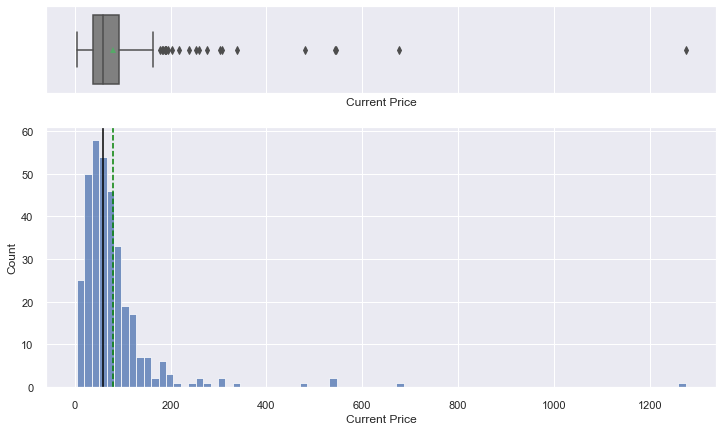

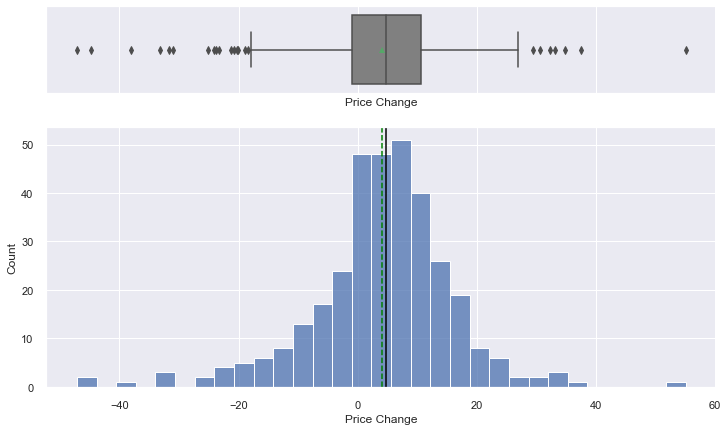

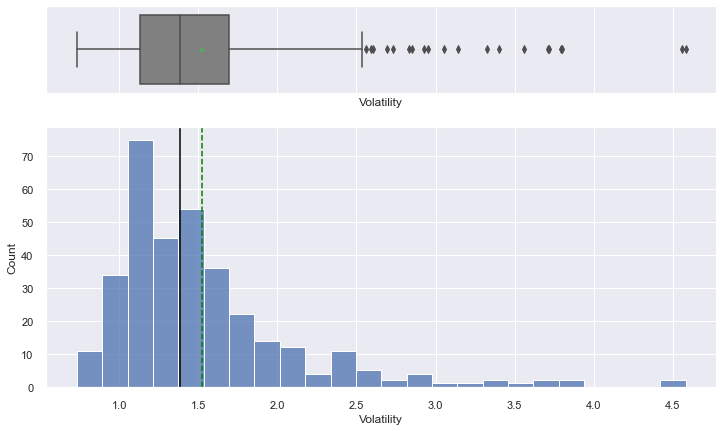

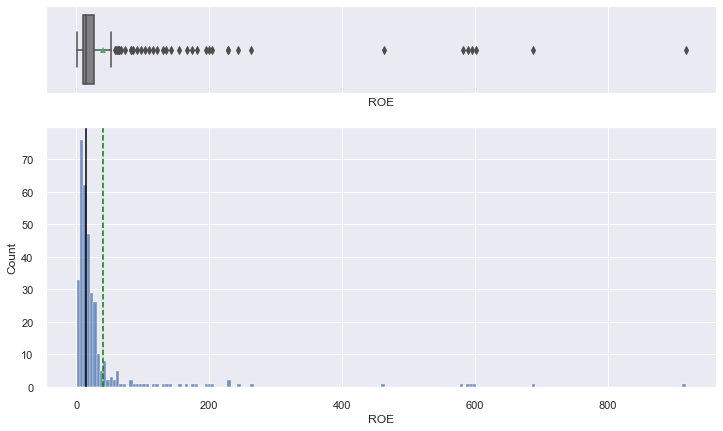

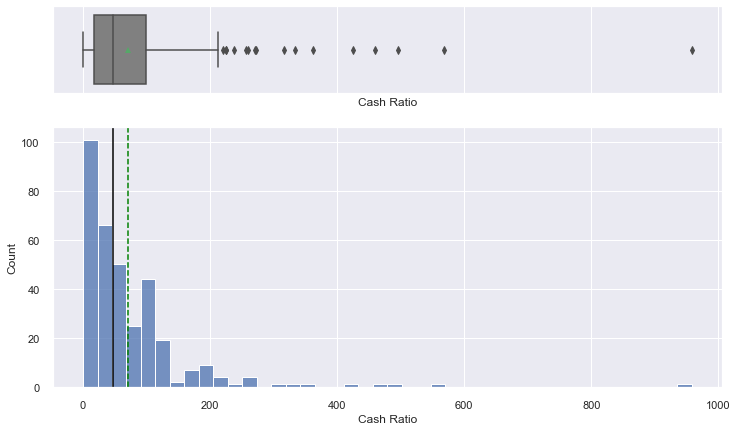

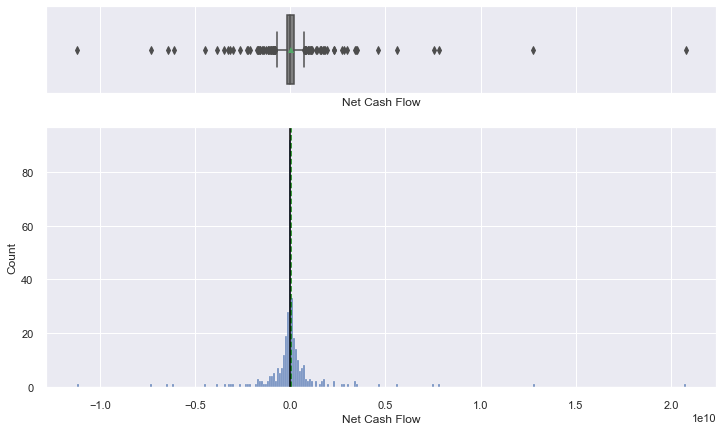

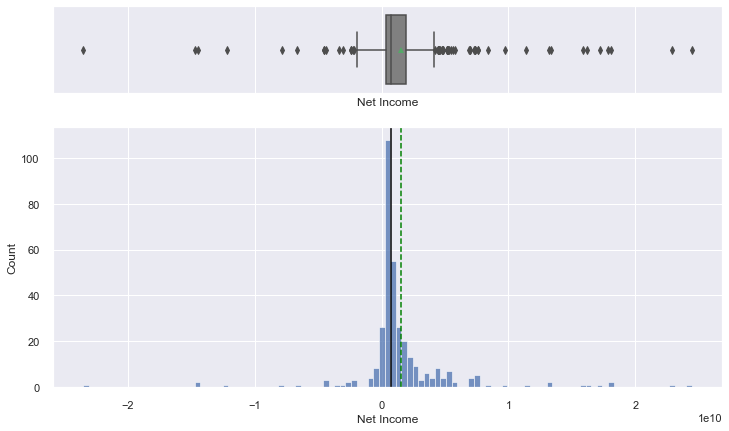

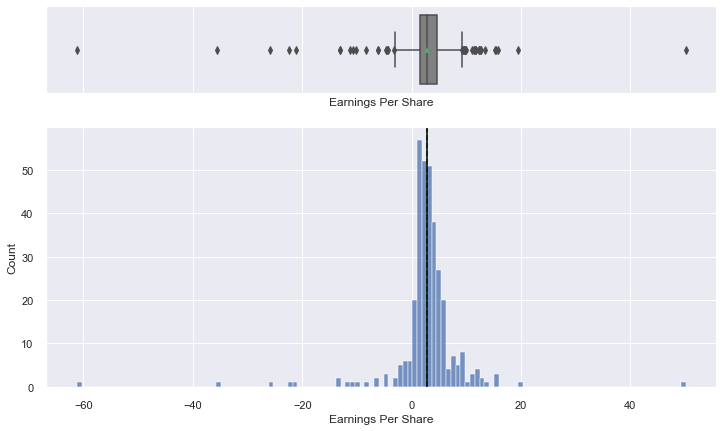

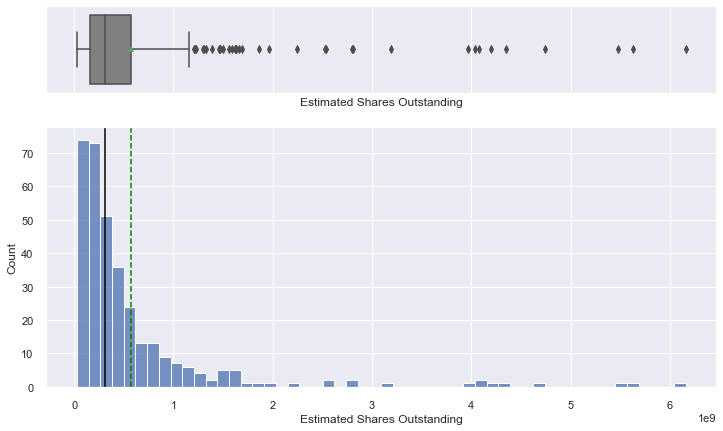

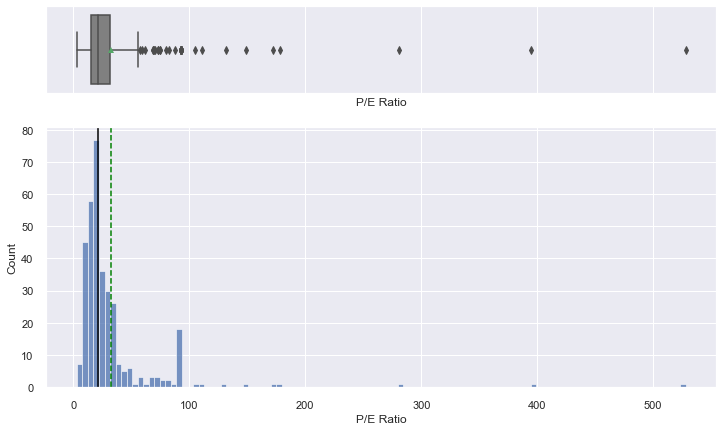

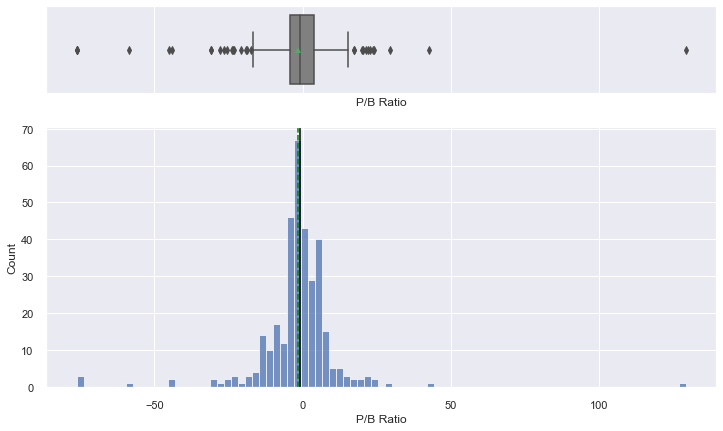

In [16]:
# function to plot histograms for all numerical variables
for col in data.select_dtypes(
    include=np.number
):  # iterates through each column of type numeric in data
    histogram_boxplot(
        data=data, feature=col
    )  # creates boxplot and histogram plot of each column of data type numeric

#### Overview of Histogram Plots in the Dataset

- The `Current Price` of the stock is highly right skewed.
- Variable `Price Change` has a normal distribution.
- Variable `Volatility` is right skewed.
- Variable `ROE` is highly right skewed.
- Variable `Cash Ratio` is highly right skewed.
- Variable `New Cash Flow` has a normal distrbution.
- Variable `Net Income` is close to a normal distribution.
- Variable `Earnings Per Share` is close to a normal distribution.
- Variable `Estimated Shares Outstanding` is highly right skewed.
- Variable `P/E Ratio` is highly right skewed.
- Variable `P/B Ratio` is close to a normal distribution.
- All variables reflected in the histogram plots have outliers of some magnitude.

In [17]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired_r",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [18]:
# value count of column GICS Sector
data["GICS Sector"].value_counts()

Industrials                    53
Financials                     49
Consumer Discretionary         40
Health Care                    40
Information Technology         33
Energy                         30
Real Estate                    27
Utilities                      24
Materials                      20
Consumer Staples               19
Telecommunications Services     5
Name: GICS Sector, dtype: int64

In [19]:
# value by percentage of column GICS Sector 
data["GICS Sector"].value_counts(1)

Industrials                    0.155882
Financials                     0.144118
Consumer Discretionary         0.117647
Health Care                    0.117647
Information Technology         0.097059
Energy                         0.088235
Real Estate                    0.079412
Utilities                      0.070588
Materials                      0.058824
Consumer Staples               0.055882
Telecommunications Services    0.014706
Name: GICS Sector, dtype: float64

In [20]:
# statistical summary of column
data["GICS Sector"].describe()

count             340
unique             11
top       Industrials
freq               53
Name: GICS Sector, dtype: object

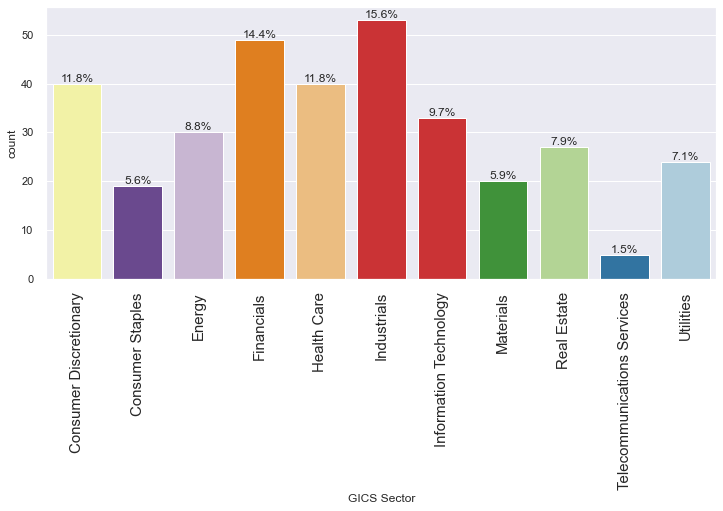

In [21]:
labeled_barplot(data, 'GICS Sector', perc=True)

- There are companies from 11 economic sectors and 104 sub-industry groups in the data.
- At 15%.6, most of the companies are from the Industrials sector, with the Finance sector closely behind at 14.4%.
- Telecommunication Services was the least represented in the dataset at just 1.5%.

In [22]:
# value counts of column GICS Sub Industry
data["GICS Sub Industry"].value_counts()

Oil & Gas Exploration & Production                 16
REITs                                              14
Industrial Conglomerates                           14
Electric Utilities                                 12
Internet Software & Services                       12
Health Care Equipment                              11
MultiUtilities                                     11
Banks                                              10
Property & Casualty Insurance                       8
Biotechnology                                       7
Diversified Financial Services                      7
Semiconductors                                      6
Pharmaceuticals                                     6
Oil & Gas Refining & Marketing & Transportation     6
Packaged Foods & Meats                              6
Managed Health Care                                 5
Integrated Oil & Gas                                5
Consumer Finance                                    5
Health Care Facilities      

In [23]:
# statistical summary of column GICS Sub Industry
data["GICS Sub Industry"].describe()

count                                    340
unique                                   104
top       Oil & Gas Exploration & Production
freq                                      16
Name: GICS Sub Industry, dtype: object

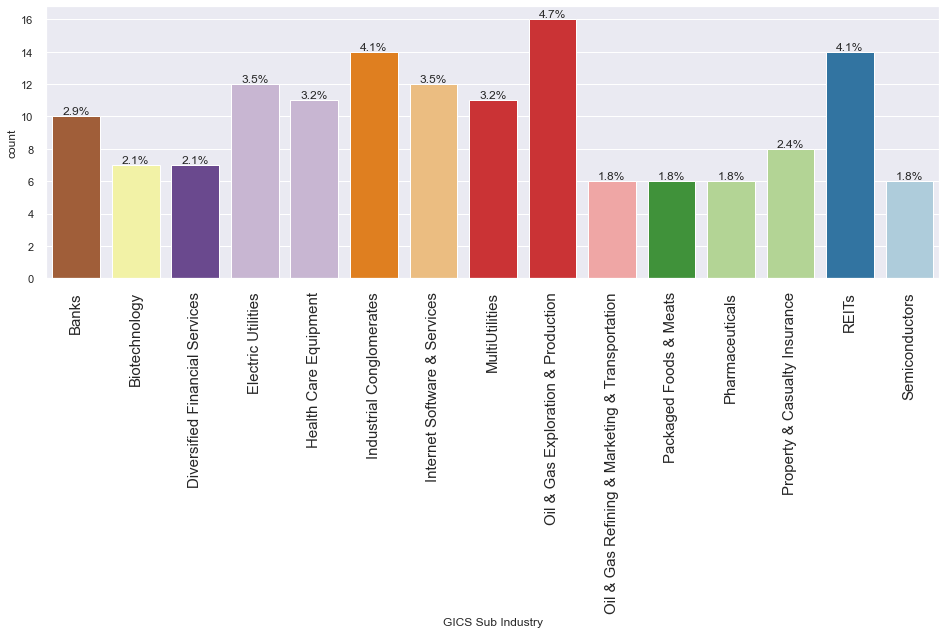

In [24]:
labeled_barplot(data, 'GICS Sub Industry', perc=True, n=15)

- Of the 340 companies designated with a sub-industry classification, there were 104 unique sub-industry classifications.
- As clearly indicated by the bar chart above, there was not a strong dominant sub-industry classification overall.
- Oil & Gas Exploration Production had the highest number of companies at 4.7%.
- Sub-industry classifications REIT's and Industrial Conglomerates came in close behind at 4.1% each.
- There were four classifications with the least weight at 1.8% each; Oil & Gas Refining, Packaged Foods & Meats, Pharmaceuticals, & Semiconductors. 

<AxesSubplot:xlabel='Net Income'>

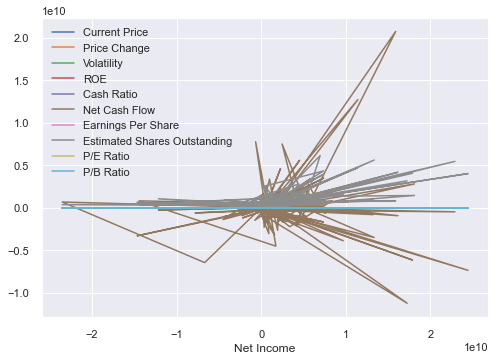

In [25]:
# plot for data visualization
data.set_index("GICS Sector", drop=False, inplace=True)
data.plot(10)

- Net Income had a wide range of values across the GICS Sectors, being both negative and positive.

<AxesSubplot:xlabel='Current Price'>

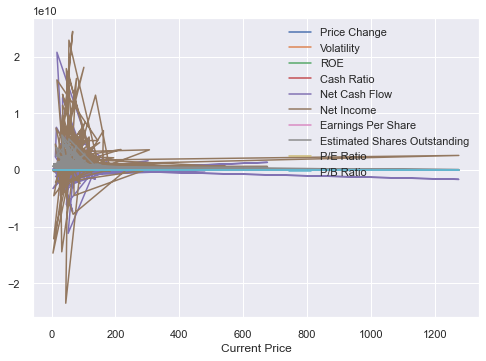

In [26]:
# plot for data visualization
data.set_index("GICS Sector", drop=False, inplace=True)
data.plot(4)

- 75% of the Current Price for a stock was less than 93 dollars, but there were a multiple outliers with a maximum of 1274.9 dollars.

<AxesSubplot:xlabel='Net Cash Flow'>

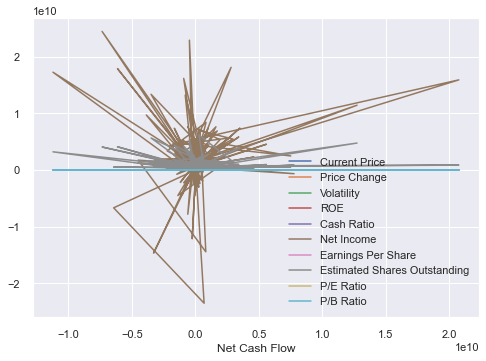

In [27]:
# plot for data visualization
data.set_index("GICS Sector", drop=False, inplace=True)
data.plot(9)

- Net Cash Flow is an important measure of a company's ability to survive and grow.  This measure was both positive and negative for the dataset.

#### Bivariate Analysis

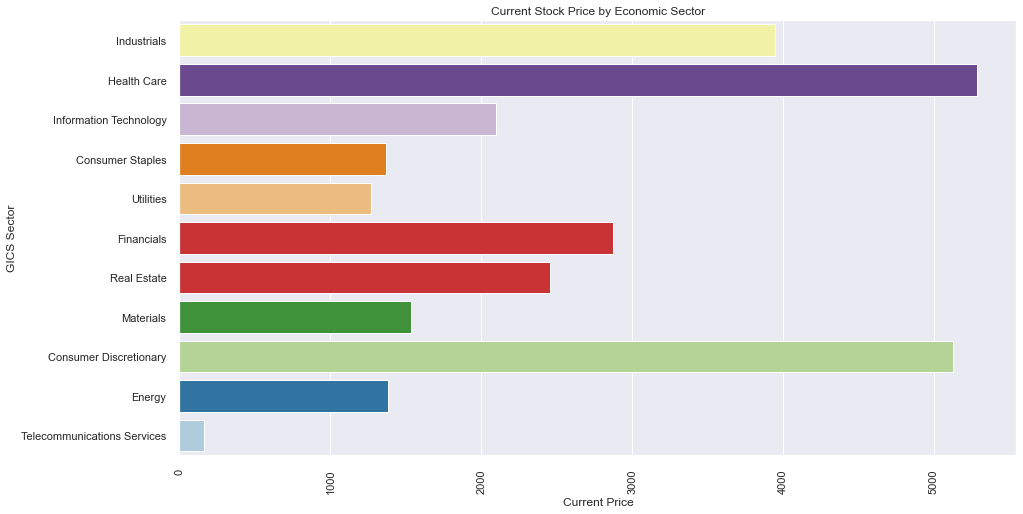

In [28]:
# plot of data visualization for two variables
plt.figure(figsize=(15,8))
sns.barplot(data=data, x='Current Price', y='GICS Sector', ci=None, estimator=sum, palette="Paired_r")
plt.xticks(rotation=90)
plt.title ('Current Stock Price by Economic Sector')
plt.show()

- Current stock prices were the highest for the Health Care sector followed closely by Consumer Discretionary stocks.
- Companies in the consumer discretionary sector sell nonessential goods and services, such as appliances, cars, and entertainment. 
- Stocks in the Telecommunication Services sector had the lowest stock price.

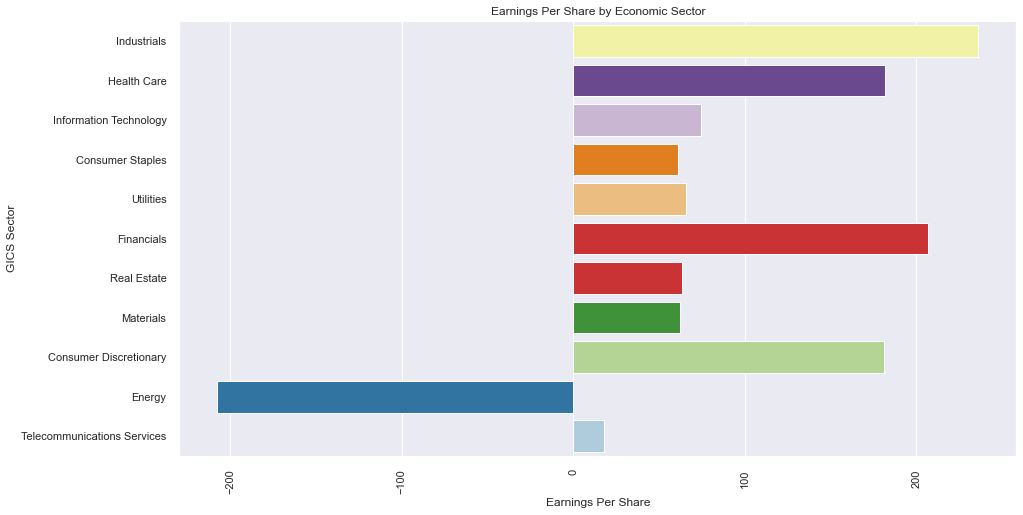

In [29]:
# plot of data visualization for two variables
plt.figure(figsize=(15,8))
sns.barplot(data=data, x='Earnings Per Share', y='GICS Sector', ci=None, estimator=sum, palette="Paired_r")
plt.xticks(rotation=90)
plt.title ('Earnings Per Share by Economic Sector')
plt.show()

- Earnings per share, or EPS, is an important financial measure. It reflects the net earnings attributable to each share of common stock. 
- EPS is a company's net profit divided by the number of common shares it has outstanding.
- The Industrials sector had the highest Earnings per share in the dataset. The Industrials sector includes goods in aerospace and defense, construction, industrial conglomerates, commerical services and transportation providers.
- On the contrary, the Energy sector had a negative earnings per share, which means the company is losing money, or spending more than it is earning.
- The Energy sector is a category of stocks that relate to producing or supplying energy, i.e., oil and gas drilling and refining or power utility companies.

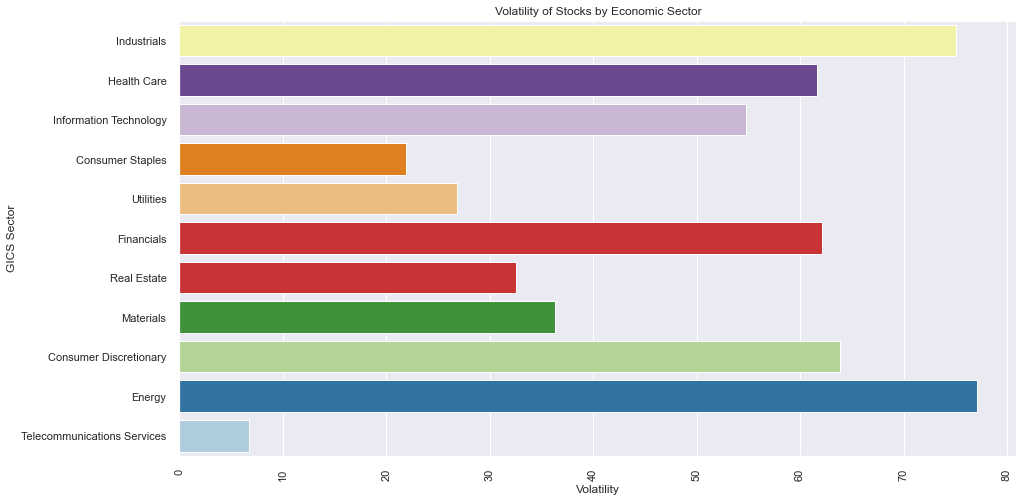

In [30]:
# plot of data visualization for two variables
plt.figure(figsize=(15,8))
sns.barplot(data=data, x='Volatility', y='GICS Sector', ci=None, estimator=sum, palette="Paired_r")
plt.xticks(rotation=90)
plt.title ('Volatility of Stocks by Economic Sector')
plt.show()

- The volatility of a stock can be defined as the dispersion of returns for a given security or market index over a period of time. It is the average difference between a stock's daily high and daily low, divided by the stock price.
- Stocks from the Energy sector exhibit high volatility on average, making them high-risk investments.
- Stocks from the Industrials sector are close behind the Energy sector regarding volatility. 

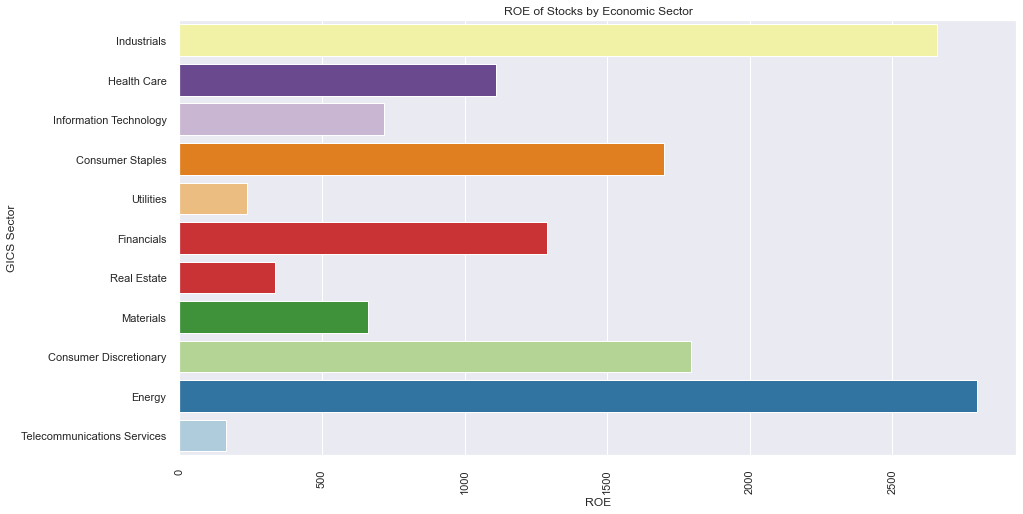

In [31]:
# plot of data visualization for two variables
plt.figure(figsize=(15,8))
sns.barplot(data=data, x='ROE', y='GICS Sector', ci=None, estimator=sum, palette="Paired_r")
plt.xticks(rotation=90)
plt.title ('ROE of Stocks by Economic Sector')
plt.show()

- Return on equity (ROE) is a measure of financial performance calculated by dividing net income by shareholders' equity.
- ROE is considered the return on net assets, thus is a gauge of a corporation's profitability and how efficient it is in generating profits.
- The Energy sector reflected the highest ROE in the dataset, but had a negative Earnings Per Share.  Both are profitability ratios.
- ROE indicates management's ability to generate a return for each dollar, while EPS measures the return on a per-share basis.
- A high ROE usually means market dominance and pricing power. 

In [32]:
# statistical summary of column current price
data["Current Price"].describe()

count     340.000000
mean       80.862345
std        98.055086
min         4.500000
25%        38.555000
50%        59.705000
75%        92.880001
max      1274.949951
Name: Current Price, dtype: float64

In [33]:
# outlier detail for column current price
data[data["Current Price"] > 1200]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
GICS Sector,,,,,,,,,,,,,,,
Consumer Discretionary,PCLN,Priceline.com Inc,Consumer Discretionary,Internet & Direct Marketing Retail,1274.949951,3.190527,1.26834,29,184,-1671386000,2551360000,50.09,50935516.07,25.453183,-1.052429


In [34]:
# viewing outliers for column Current Price
data_2 = data[data["Current Price"] > 200.0]

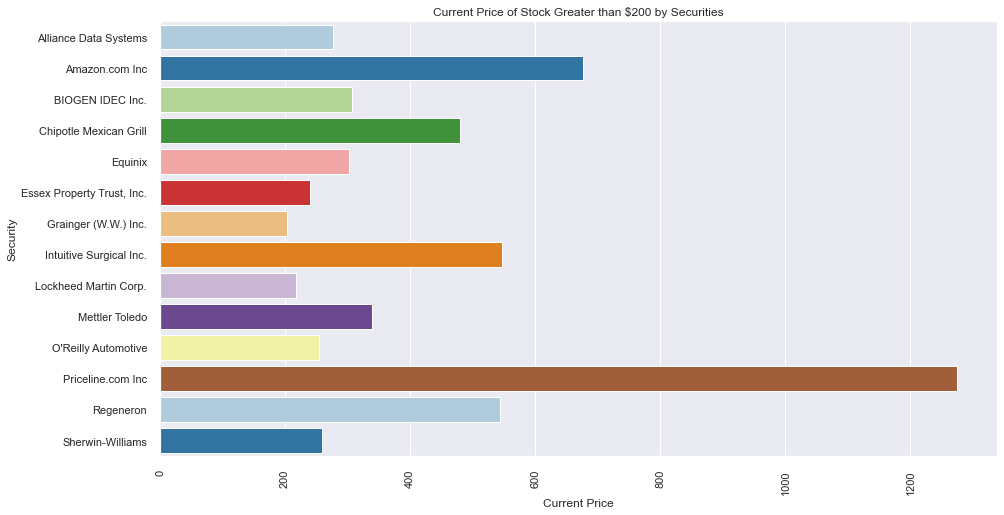

In [35]:
# plot of data visualization for two variables
plt.figure(figsize=(15,8))
sns.barplot(data=data_2, x='Current Price', y='Security', ci=None, estimator=sum, palette="Paired")
plt.xticks(rotation=90)
plt.title ('Current Price of Stock Greater than $200 by Securities')
plt.show()

- 75% of the stocks in the dataset had a current stock price of 92.8 dollars or less.  The maximum stock price belonged to Priceline at almost 1,275 dollars.
- With all of the popularity with online shopping, it is not surprising that Amazon had the second most highest price of stock.

In [36]:
# statistical summary of column ROE
data["ROE"].describe()

count    340.000000
mean      39.597059
std       96.547538
min        1.000000
25%        9.750000
50%       15.000000
75%       27.000000
max      917.000000
Name: ROE, dtype: float64

In [37]:
# outlier detail for column ROE
data[data["ROE"] > 900]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
GICS Sector,,,,,,,,,,,,,,,
Energy,APA,Apache Corporation,Energy,Oil & Gas Exploration & Production,44.470001,11.397804,2.405408,917,80,698000000,-23528000000,-61.2,384444444.4,93.089287,4.970809


In [38]:
# viewing outliers for column ROE
data_ROE = data[data["ROE"] > 200.0]

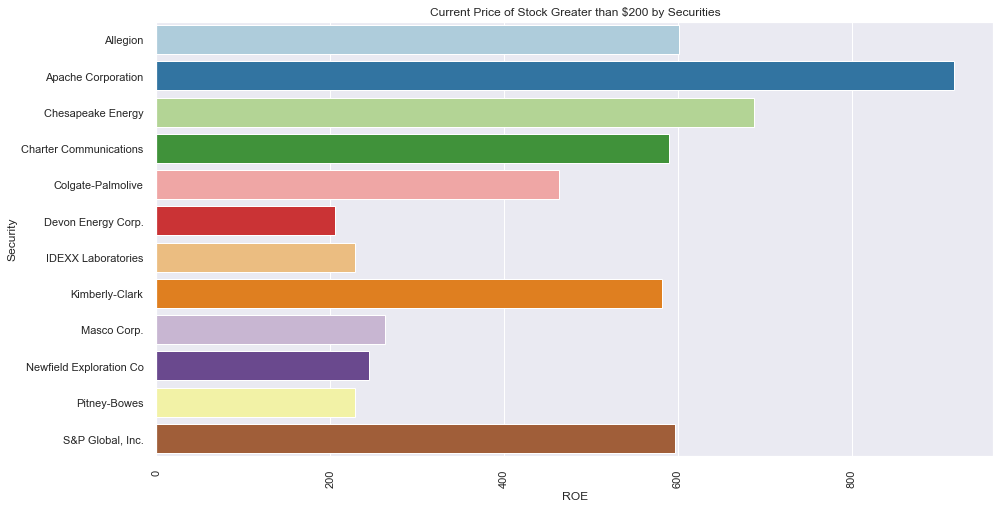

In [39]:
# plot of data visualization for two variables
plt.figure(figsize=(15,8))
sns.barplot(data=data_ROE, x='ROE', y='Security', ci=None, estimator=sum, palette="Paired")
plt.xticks(rotation=90)
plt.title ('Current Price of Stock Greater than $200 by Securities')
plt.show()

- The company with the highest ROE was Apache Corporation, a part of the Energy Sector. Apache Corporation an oil and gas exploration and production company, has onshore and offshore operations in major oil patches around the world, including in the US, Egypt, and the UK's North Sea oil fields.
- The stock is is continually gaining in price and important note is that only 0.88% of the stock of APA is held by insiders reported by Percentage Held by Institutions.
- Apache's profitability ratios (ROE) show that Apache is, again, in line with the industry. The only exception is the inventory turnover ratio, because not many of Oil Corporations in the industry have inventory, so Apache is unusually high.

In [40]:
# statistical summary of column Cash Ratio
data["Cash Ratio"].describe()

count    340.000000
mean      70.023529
std       90.421331
min        0.000000
25%       18.000000
50%       47.000000
75%       99.000000
max      958.000000
Name: Cash Ratio, dtype: float64

In [41]:
# outlier detail for column Cash Ratio
data[data["Cash Ratio"] > 900]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
GICS Sector,,,,,,,,,,,,,,,
Information Technology,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.22432,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467


In [42]:
# outlier detail for column Cash Ratio
data[data["Cash Ratio"] == 0.0]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
GICS Sector,,,,,,,,,,,,,,,
Consumer Discretionary,CHTR,Charter Communications,Consumer Discretionary,Cable & Satellite,183.100006,3.598507,1.697942,589,0,2000000,-271000000,-2.43,111522633.7,20.819876,-76.119077
Energy,COG,Cabot Oil & Gas,Energy,Oil & Gas Exploration & Production,17.690001,-20.099360,3.055818,6,0,-20440000,-113891000,-0.28,406753571.4,93.089287,-0.223147
Utilities,LNT,Alliant Energy Corp,Utilities,Electric Utilities,31.225001,6.642759,1.115842,10,0,-51100000,388400000,3.36,115595238.1,9.293155,-4.606591
Energy,RRC,Range Resources Corp.,Energy,Oil & Gas Exploration & Production,24.610001,-25.106512,3.712995,26,0,23000,-713685000,-4.29,166360139.9,93.089287,0.525090


In [43]:
# viewing outliers for column Cash Ratio
data_CashRatio = data[data["Cash Ratio"] > 200.0]

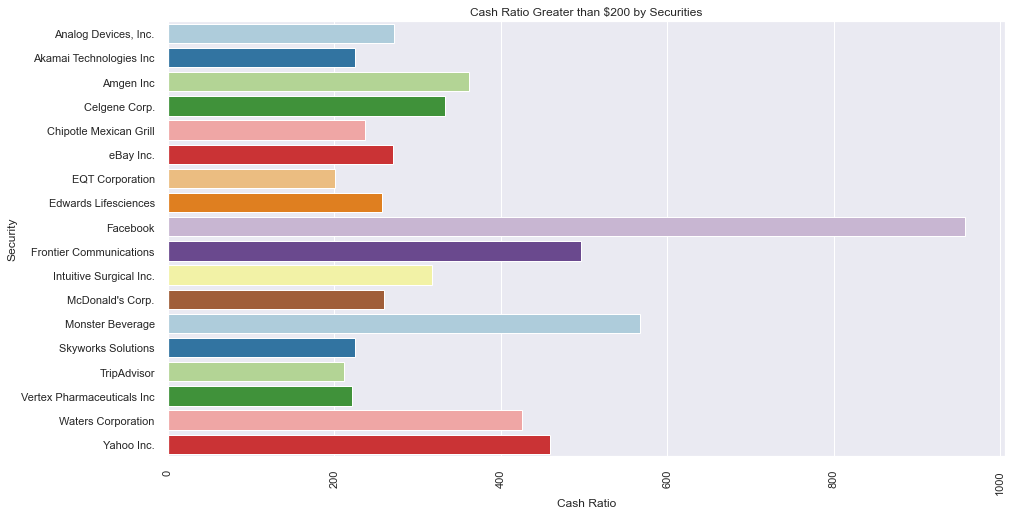

In [44]:
# plot of data visualization for two variables
plt.figure(figsize=(15,8))
sns.barplot(data=data_CashRatio, x='Cash Ratio', y='Security', ci=None, estimator=sum, palette="Paired")
plt.xticks(rotation=90)
plt.title ('Cash Ratio Greater than $200 by Securities')
plt.show()

- Company Facebook had the highest Cash Ratio, at 958, followed by Monster Beverage in second. 
- Cash Ratio is a liquidity measure that shows a company's ability to cover its short-term obligations using only cash and cash equivalents.
- 75% of the Companies had a Cash Ratio less than 99 in the dataset. 
- There were 4 Securities that had a Cash Ratio of 0.0 in the dataset.  A Cash Ratio less than 1.0 means that there are more current liabilities than cash and cash equivalents.

In [45]:
# statistical summary of column P/B Ratio
data["P/B Ratio"].describe()

count    340.000000
mean      -1.718249
std       13.966912
min      -76.119077
25%       -4.352056
50%       -1.067170
75%        3.917066
max      129.064585
Name: P/B Ratio, dtype: float64

In [46]:
# outlier detail for column P/B Ratio
data[data["P/B Ratio"] > 50]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
GICS Sector,,,,,,,,,,,,,,,
Information Technology,ADS,Alliance Data Systems,Information Technology,Data Processing & Outsourced Services,276.570007,6.189286,1.116976,30,25,90885000,596541000,8.91,66951851.85,31.040405,129.064585


In [47]:
# viewing outliers for column P/B Ratio
data_PBRatio = data[data["P/B Ratio"] > 15]

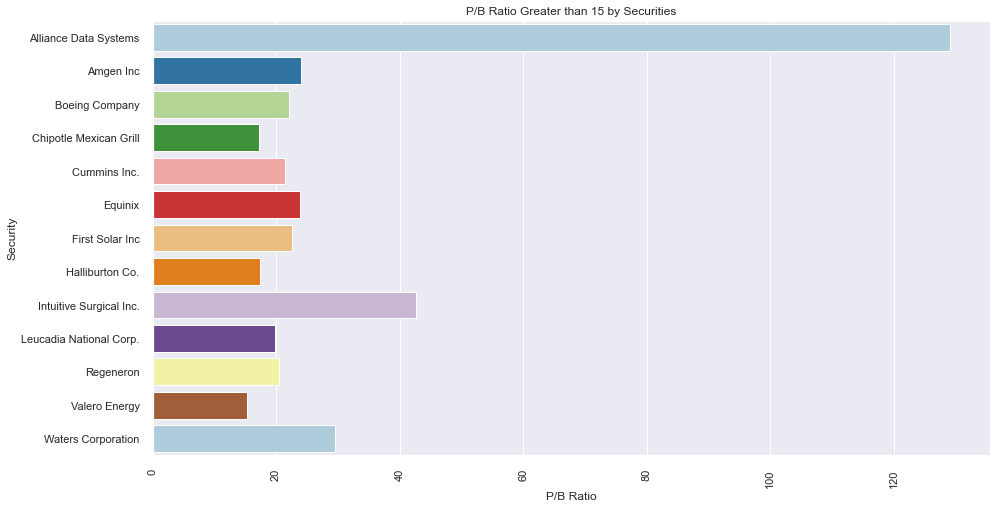

In [48]:
# data visualization for P/B Ratio
plt.figure(figsize=(15,8))
sns.barplot(data=data_PBRatio, x='P/B Ratio', y='Security', ci=None, estimator=sum, palette="Paired")
plt.xticks(rotation=90)
plt.title ('P/B Ratio Greater than 15 by Securities')
plt.show()

- Alliance Data Systems (ADS) had the highest P/B ratio, which is the market's valuation of a company relative to its book value.
- Widely used among the 'value' investing crowd, the P/B ratio can be used to identify undervalued stocks in the market.
- ADS is a leading provider of tech-forward payment and lending solutions, serving customers and consumer-based industries in North America across industries: retail, travel, auto, & medical.
- 75% of the P/B ratios were less than 3.9; ADS reflected a ratio of 129.1, with the overall average, for the dataset, being -1.7.        

### Bivariate Analysis

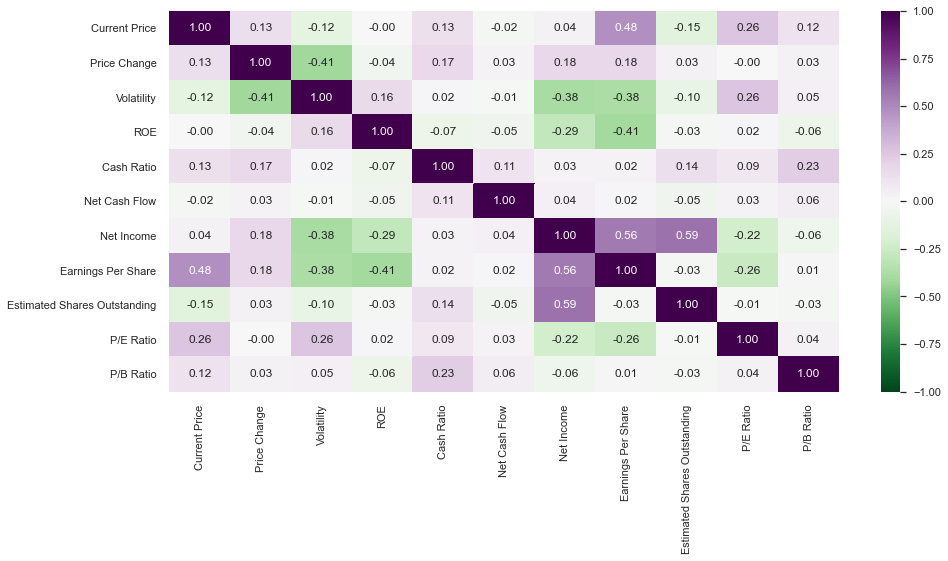

In [49]:
# Heatmap to plot correlation between variables
plt.figure(figsize=(15, 7))
sns.heatmap(
    data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="PRGn_r"
)
plt.show()

- None of the variables showed a very high correlation with each other.
- Net Income, Earnings per Share, and Estimated Shares Outstanding reflected a positive correlation with each other.
- As anticipated, Volatility and Net Income & Earnings per Share had a strong negative correlation.
- ROE and Earnings per Share, while both profitability ratios, reflected the strongest negative correlation with each other in the dataset.

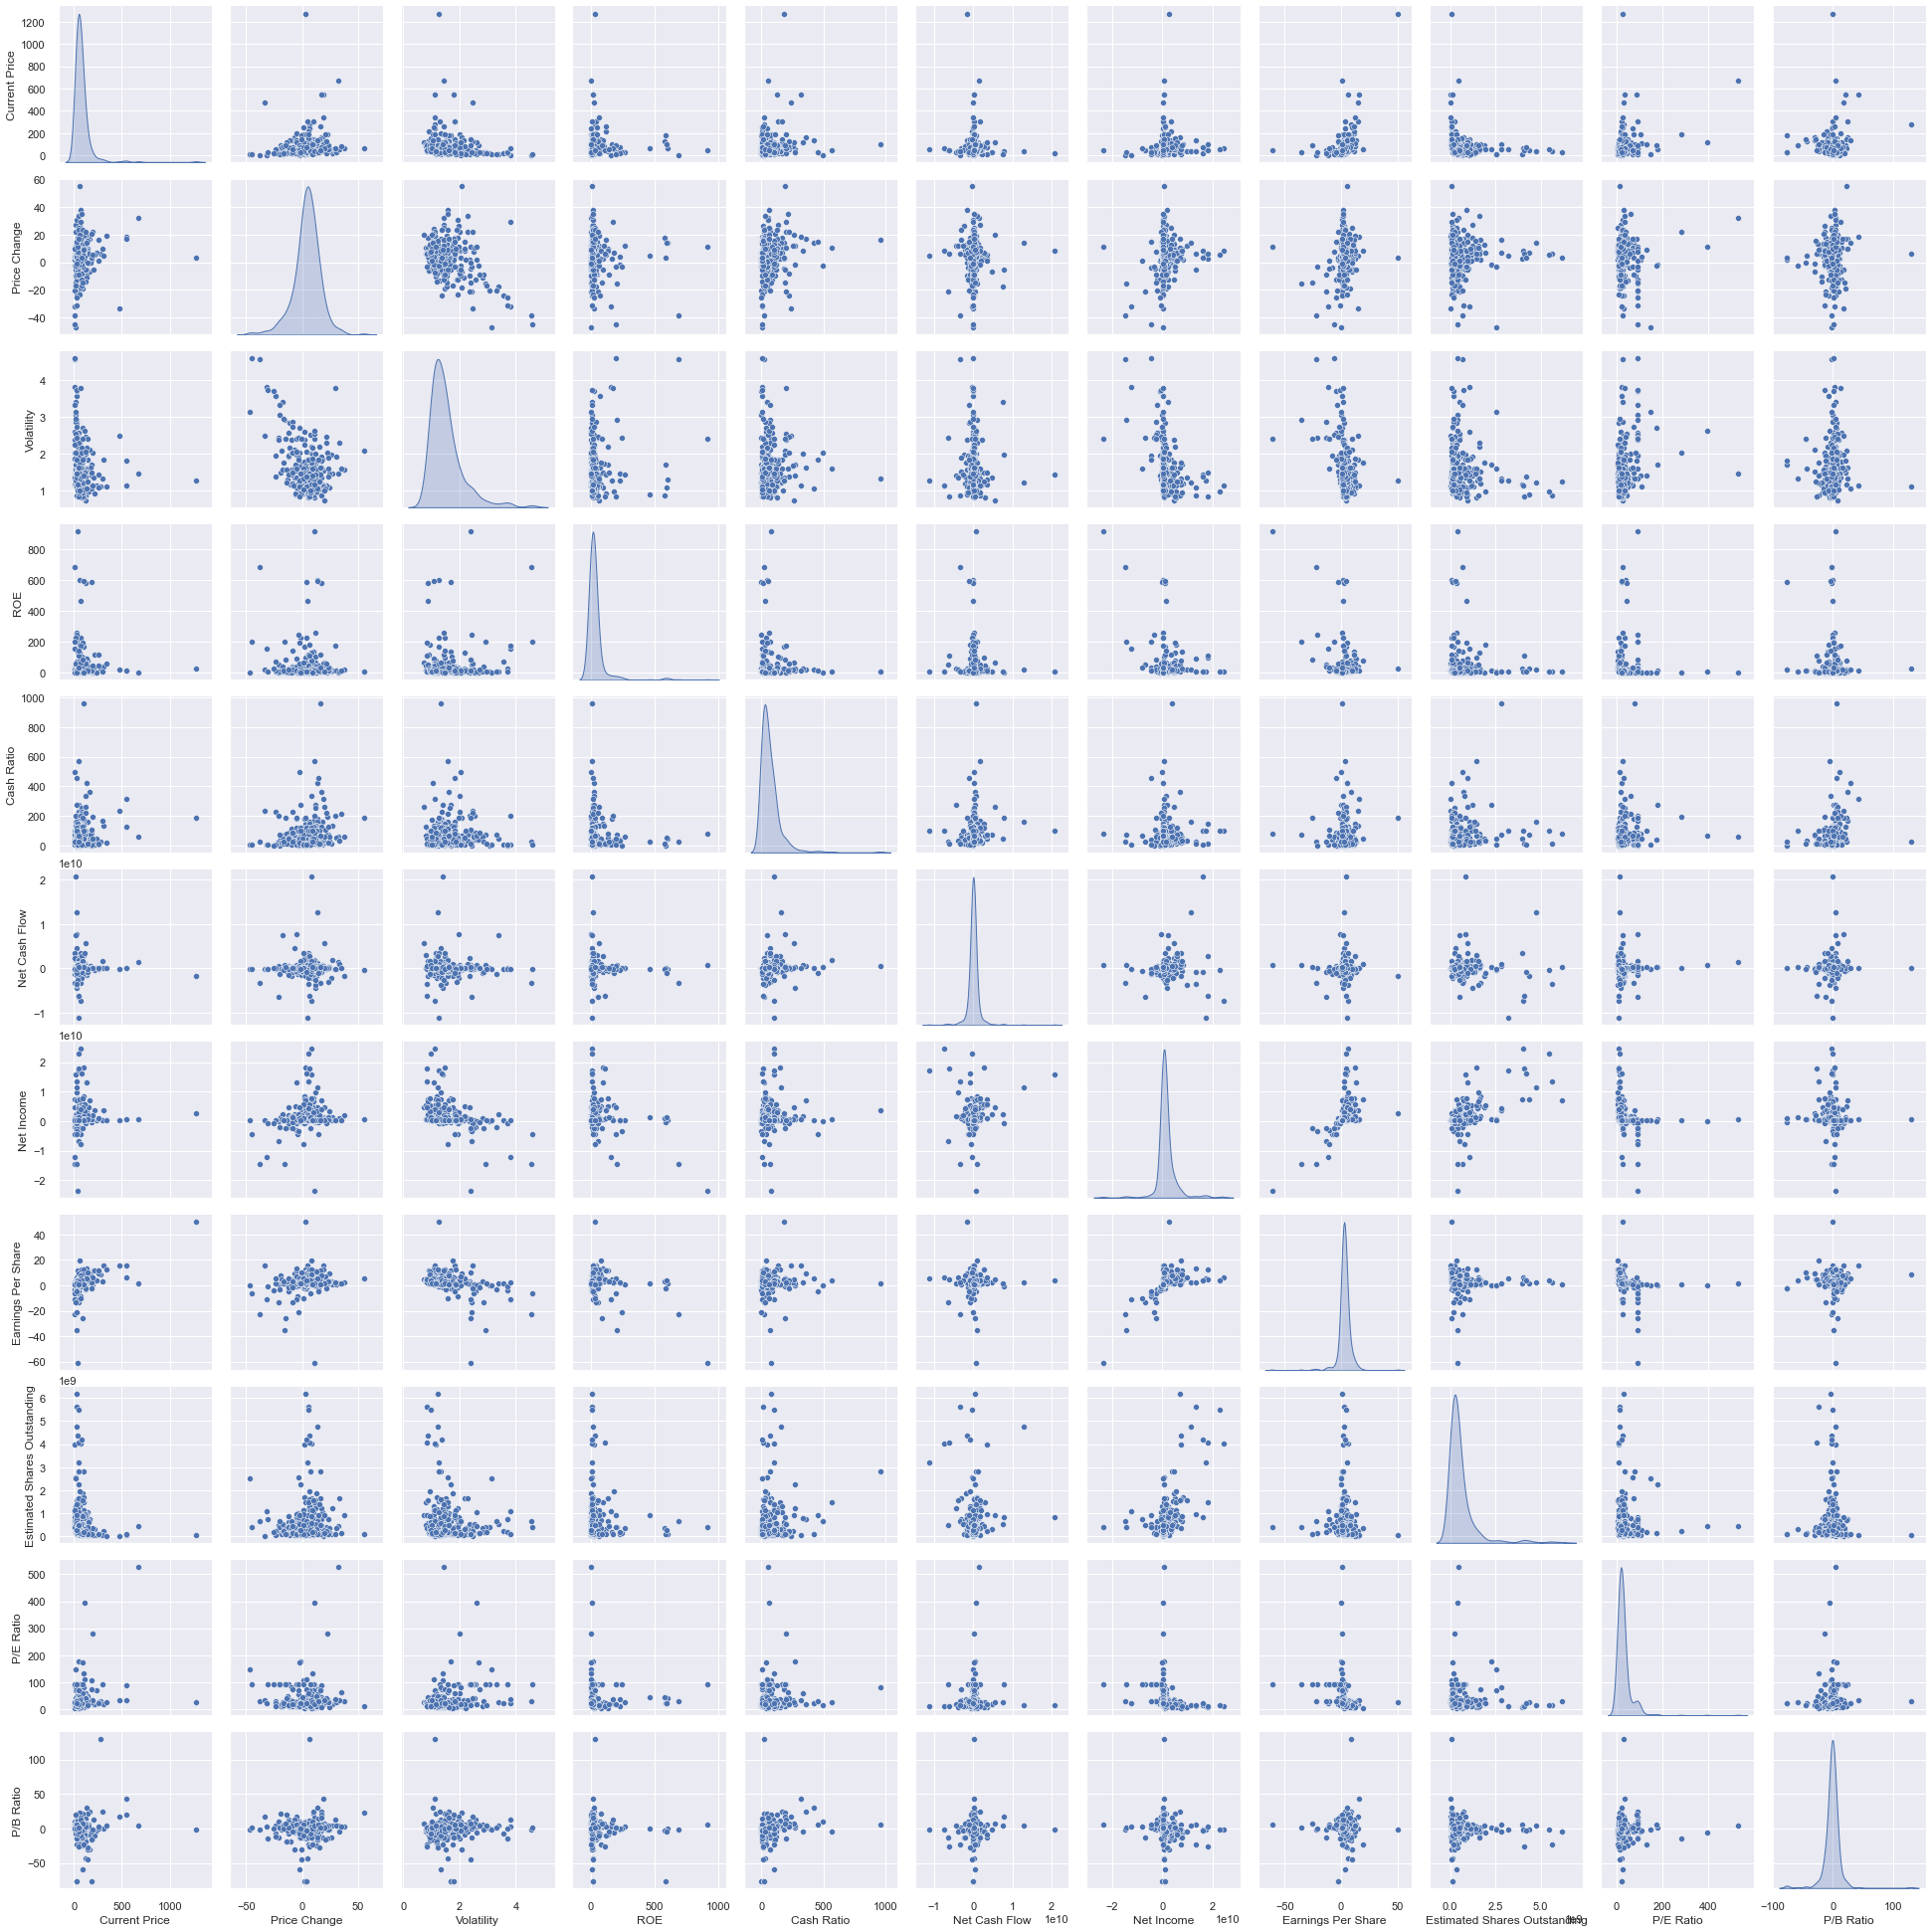

In [51]:
# selecting numerical columns
num_col = data.select_dtypes(include=np.number).columns.tolist()

sns.pairplot(data=data[num_col], diag_kind="kde")
plt.show()

- Outliers noted on the pair plots, but will be treated.

<AxesSubplot:xlabel='Current Price', ylabel='Volatility'>

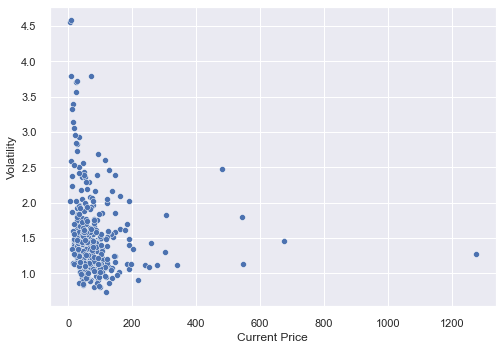

In [52]:
# Plots the scatter plot using two variables
sns.scatterplot(data['Current Price'], data['Volatility'])  

- As indicated from the scatterplot, an increase in the current price of a stock does not increase volatility.  They do not have a high correlation, in fact, their correlation is -0.12 in this dataset.

<AxesSubplot:xlabel='Price Change', ylabel='Volatility'>

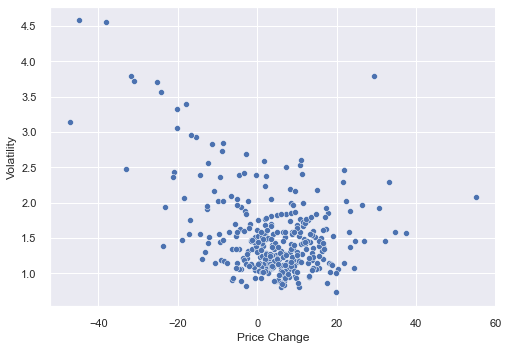

In [53]:
# Plots the scatter plot using two variables
sns.scatterplot(data['Price Change'], data['Volatility'])  

- As indicated in the scatterplot, an increase in price can have a negative impact on volatility.  As indicated on the plot, the correlation is negative and is -0.41 in our dataset as reflected earlier. 

<AxesSubplot:xlabel='ROE', ylabel='Volatility'>

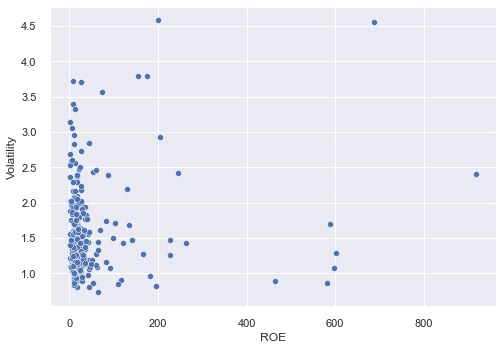

In [54]:
# Plots the scatter plot using two variables
sns.scatterplot(data['ROE'], data['Volatility'])  # Plots the scatter plot using two variables

- As shown in the scatterplot, an increase in ROE, or financial performance/profitability, has a negative impact on volatility of a stock.
- As indicated on the plot, the correlation hovers close to zero and is 0.16 in our dataset as stated earlier.

<AxesSubplot:xlabel='Cash Ratio', ylabel='Volatility'>

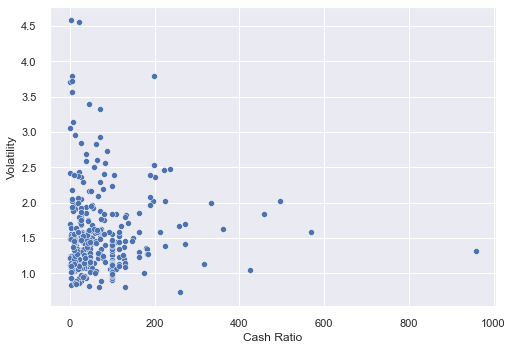

In [55]:
# Plots the scatter plot using two variables
sns.scatterplot(data['Cash Ratio'], data['Volatility'])  

- As with ROE, an increase in Cash Ratio does not increase necessarily with volatility, but rather hovers close to zero.
- As indicated on the plot, the correlation hovers close to zero and is 0.02 in our dataset as reflected earlier in the heatmap.

<AxesSubplot:xlabel='Net Cash Flow', ylabel='Volatility'>

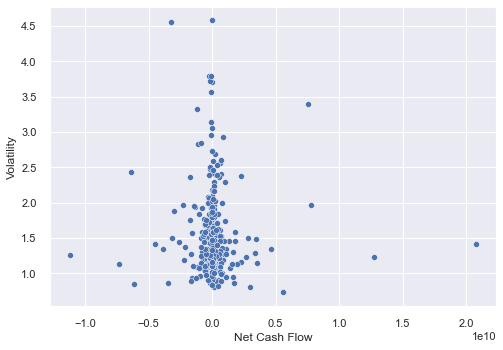

In [56]:
# Plots the scatter plot using two variables
sns.scatterplot(data['Net Cash Flow'], data['Volatility'])  # Plots the scatter plot using two variables

- Net Cash Flow is another variable that hovers around zero as volatility increases.  This variable had a correlation value of 0.01 in the dataset as reflected in the heatmap.

<AxesSubplot:xlabel='Net Income', ylabel='Volatility'>

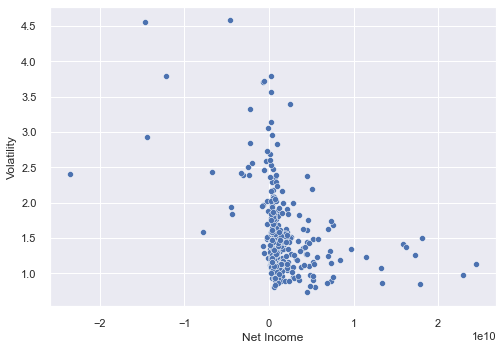

In [57]:
# Plots the scatter plot using two variables
sns.scatterplot(data['Net Income'], data['Volatility'])  # Plots the scatter plot using two variables

- As expected, Net Income has a negative correlation with volatility.  The correlation between these two variables was -0.38 in the dataset as reflected from the heatmap.

### Key Questions Addressed

### Distribution of Stock Prices

<AxesSubplot:xlabel='Current Price', ylabel='Count'>

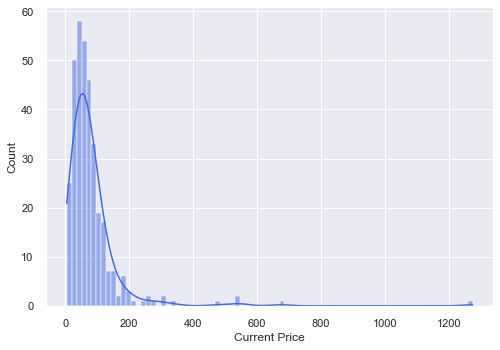

In [58]:
# creates histplot of distribution of current stock prices
sns.histplot(data=data, x="Current Price", kde=True, color="royalblue")

- Current stock price is highly right skewed.  
- The average price of a stock is 80.9 dollars with the maximum being almost 1,275 dollars.
- 75% of the stock purchased were for prices less than 92.8 dollars with the minimum stock price being 4.5 dollars.

### Stocks that have seen the greatest Price Increase on Average

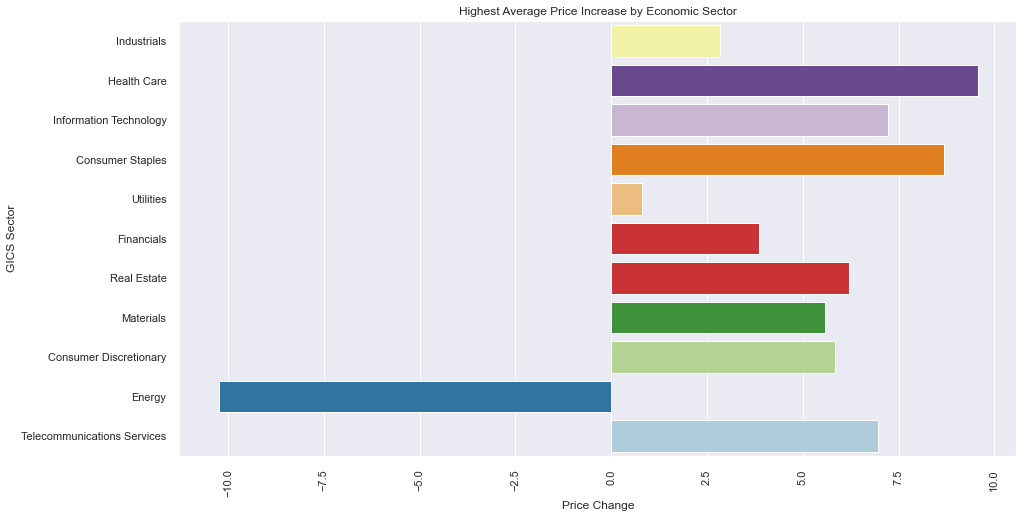

In [59]:
plt.figure(figsize=(15,8))
sns.barplot(data=data, x='Price Change', y='GICS Sector', ci=False, palette="Paired_r")
plt.xticks(rotation=90)
plt.title ('Highest Average Price Increase by Economic Sector')
plt.show()

- Stocks from the Healthcare sector witnessed the maximum price increase on average with Consumer Staples following close behind in second place.
- Stocks from the Energy sector were the only ones to witness a price drop on average.

### Correlation of Variables

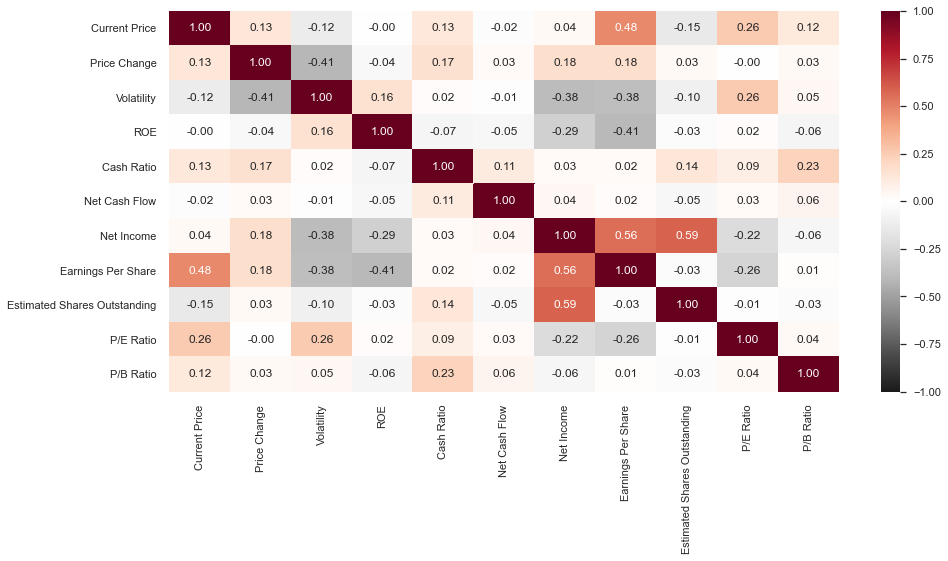

In [60]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="RdGy_r"
)
plt.show()

- There were 11 numerical datatype variables.
- None of the variables showed a very high correlation with each other.
- Net Income, Earnings per Share, and Estimated Shares Outstanding reflected a positive correlation with each other.
- As anticipated, Volatility and Net Income & Earnings per Share had a strong negative correlation.
- ROE and Earnings per Share, while both profitability ratios, reflected the strongest negative correlation with each other in the dataset.

### Cash Ratio across Economic Sectors

In [61]:
# outlier detail for column Cash Ratio
data[data["Cash Ratio"] > 300]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
GICS Sector,,,,,,,,,,,,,,,
Health Care,AMGN,Amgen Inc,Health Care,Biotechnology,162.330002,17.163478,1.630259,25,362,413000000,6939000000,9.15,7.583607e+08,17.740984,24.012322
Health Care,CELG,Celgene Corp.,Health Care,Biotechnology,119.760002,8.448793,2.000828,27,333,758700000,1602000000,2.02,7.930693e+08,59.287130,-4.320051
Information Technology,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
Telecommunications Services,FTR,Frontier Communications,Telecommunications Services,Integrated Telecommunications Services,4.670000,-2.301255,2.026818,3,496,254000000,-196000000,-0.29,6.758621e+08,14.518987,10.497704
Health Care,ISRG,Intuitive Surgical Inc.,Health Care,Health Care Equipment,546.159973,18.733013,1.126009,14,317,114300000,588800000,15.87,3.710145e+07,34.414617,42.607500
Consumer Staples,MNST,Monster Beverage,Consumer Staples,Soft Drinks,49.653332,10.800357,1.585944,11,568,1805094000,546733000,3.71,1.469542e+09,25.420118,-5.190734
Health Care,WAT,Waters Corporation,Health Care,Health Care Distributors,134.580002,13.925341,1.044615,23,425,65488000,469053000,5.70,8.229000e+07,23.610527,29.547150
Information Technology,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,9.394573e+08,28.976191,6.261775


In [62]:
# outlier detail for column Cash Ratio
data[data["Cash Ratio"] < 2]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
GICS Sector,,,,,,,,,,,,,,,
Consumer Discretionary,AN,AutoNation Inc,Consumer Discretionary,Specialty Stores,59.660000,2.350316,1.480914,19,1,-1300000,442600000,3.93,112620865.1,15.180662,-7.970104
Consumer Discretionary,CHTR,Charter Communications,Consumer Discretionary,Cable & Satellite,183.100006,3.598507,1.697942,589,0,2000000,-271000000,-2.43,111522633.7,20.819876,-76.119077
Energy,COG,Cabot Oil & Gas,Energy,Oil & Gas Exploration & Production,17.690001,-20.099360,3.055818,6,0,-20440000,-113891000,-0.28,406753571.4,93.089287,-0.223147
Utilities,ES,Eversource Energy,Utilities,MultiUtilities,51.070000,0.709921,1.232829,8,1,-14756000,878485000,2.77,317142599.3,18.436823,-1.169833
Industrials,JBHT,J. B. Hunt Transport Services,Industrials,Trucking,73.360001,2.961405,1.218373,33,1,-395000,427235000,3.69,115781842.8,19.880759,2.823845
Utilities,LNT,Alliant Energy Corp,Utilities,Electric Utilities,31.225001,6.642759,1.115842,10,0,-51100000,388400000,3.36,115595238.1,9.293155,-4.606591
Energy,NFX,Newfield Exploration Co,Energy,Oil & Gas Exploration & Production,32.560001,-3.296695,2.421529,244,1,-9000000,-3362000000,-21.18,158734655.3,93.089287,-0.138596
Energy,RRC,Range Resources Corp.,Energy,Oil & Gas Exploration & Production,24.610001,-25.106512,3.712995,26,0,23000,-713685000,-4.29,166360139.9,93.089287,0.525090


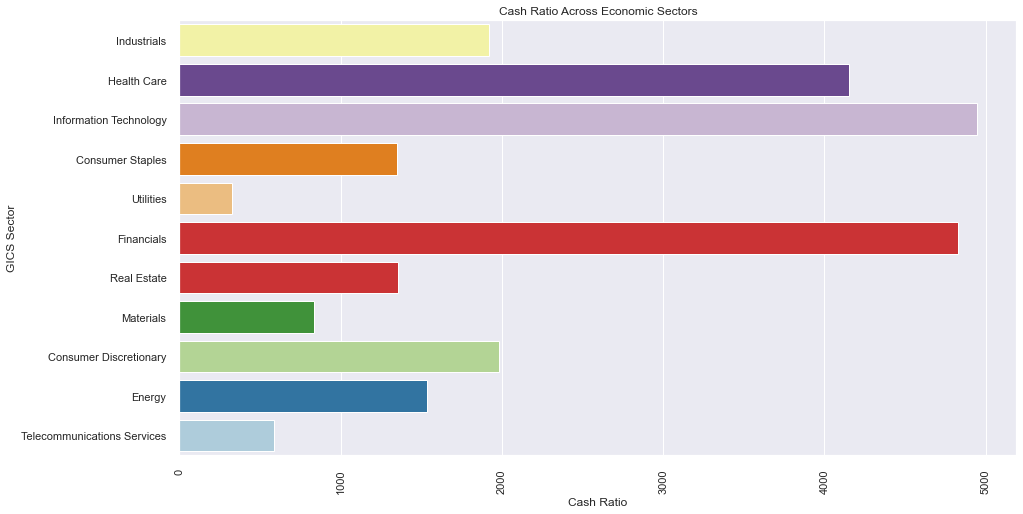

In [63]:
plt.figure(figsize=(15,8))
sns.barplot(data=data, x='Cash Ratio', y='GICS Sector', ci=None, estimator=sum, palette="Paired_r")
plt.xticks(rotation=90)
plt.title ('Cash Ratio Across Economic Sectors')
plt.show()

- The cash ratio is one of three common methods to evaluate a company's liquidity—its ability to pay off its short-term debt. 
- There were three large performers that had the highest Cash Ratio based on the GICS Economic Sectors; Information Technology, Financials and Health Care.
- Facebook, a company in the Information Technology sector, had the highest Cash Ratio at 958. 
- Yahoo, another company in the top 8 with at least a ratio of 300, had a Cash Ratio of 459. 
- Interestingly, the lowest 8 Securities in the dataset had a ratio of 0 or 1, spanning the Energy, Utilies & Consumer Discretionary sectors. 
- A cash ratio lower than 1 does sometimes indicate that a company is at risk of having financial difficulty. However, a low cash ratio may also be an indicator of a company's specific strategy that calls for maintaining low cash reserves—because funds are being used for expansion, for example.

### P/E Ratio across Economic Sectors

In [64]:
# statistical summary of column P/E Ratio
data["P/E Ratio"].describe()

count    340.000000
mean      32.612563
std       44.348731
min        2.935451
25%       15.044653
50%       20.819876
75%       31.764755
max      528.039074
Name: P/E Ratio, dtype: float64

In [65]:
# outlier detail for column P/E Ratio
data[data["P/E Ratio"] > 100]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
GICS Sector,,,,,,,,,,,,,,,
Information Technology,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810
Health Care,ALXN,Alexion Pharmaceuticals,Health Care,Biotechnology,190.750000,22.338380,2.022921,2,195,66000000,144000000,0.68,2.117647e+08,280.514706,-14.171389
Consumer Discretionary,AMZN,Amazon.com Inc,Consumer Discretionary,Internet & Direct Marketing Retail,675.890015,32.268105,1.460386,4,58,1333000000,596000000,1.28,4.656250e+08,528.039074,3.904430
Health Care,BCR,Bard (C.R.) Inc.,Health Care,Health Care Equipment,189.440002,1.549182,1.394436,9,82,-9600000,135400000,1.80,7.522222e+07,105.244446,-4.127770
Energy,CXO,Concho Resources,Energy,Oil & Gas Exploration & Production,92.860001,-2.744032,2.692546,1,38,228529000,65900000,0.54,1.220370e+08,171.962965,5.673991
Energy,KMI,Kinder Morgan,Energy,Oil & Gas Refining & Marketing & Transportation,14.920000,-47.129693,3.139352,1,7,-86000000,253000000,0.10,2.530000e+09,149.200000,-1.894071
Information Technology,NFLX,Netflix Inc.,Information Technology,Internet Software & Services,114.379997,11.145654,2.605949,6,65,695722000,122641000,0.29,4.229000e+08,394.413783,-5.700168
Real Estate,SLG,SL Green Realty,Real Estate,Office REITs,112.980003,4.004424,1.091967,4,47,-26010000,284084000,1.02,2.785137e+08,110.764709,-3.089477
Health Care,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,1.884615e+08,131.525636,-23.884449


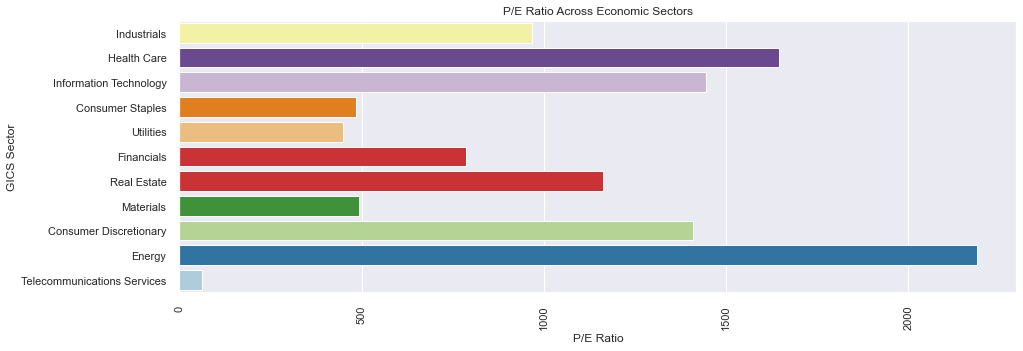

In [66]:
# plot of data visualization for two variables
plt.figure(figsize=(15,5))
sns.barplot(data=data, x='P/E Ratio', y='GICS Sector', ci=None, estimator=sum, palette="Paired_r")
plt.xticks(rotation=90)
plt.title ('P/E Ratio Across Economic Sectors')
plt.show()

- The price-to-earnings ratio (P/E ratio) is the ratio for valuing a company that measures its current share price relative to its earnings per share (EPS).
- A higher P/E ratio shows that investors are willing to pay a higher share price today because of growth expectations in the future. The average P/E for the S&P 500 has historically ranged from 13 to 15.
- In the current dataset, the Energy sector had the highest P/E Ratio across all economic sectors, with Health Care and Information Technology following.
- Telecommunication Services had the lowest P/E ratio which means that their stocks are undervalued.

### EDA Overview

- From the Histogram Plots, the following was reflected:
- The Current Price of the stock is highly right skewed.
- Variable Price Change has a normal distribution.
- Variable Volatility is right skewed.
- The Current Price of the stock is highly right skewed.
- Variable Price Change has a normal distribution.
- Variable Volatility is right skewed.
- Variable ROE is highly right skewed.
- Variable Cash Ratio is highly right skewed.
- Variable New Cash Flow has a normal distrbution.
- Variable Net Income is close to a normal distribution.
- Variable Earnings Per Share is close to a normal distribution.
- Variable Estimated Shares Outstanding is highly right skewed.
- Variable P/E Ratio is highly right skewed.
- Variable P/B Ratio is close to a normal distribution.
- All variables reflected in the histogram plots have outliers of some magnitude.

- There are companies from 11 economic sectors and 104 sub-industry groups in the data.
- At 15%.6, most of the companies are from the Industrials sector, with the Finance sector closely behind at 14.4%.
- Telecommunication Services was the least represented in the dataset at just 1.5%.
- Of the 340 companies designated with a sub-industry classification, there were 104 unique sub-industry classifications.
- There was not a strong dominant sub-industry classification overall.
- Oil & Gas Exploration Production had the highest number of companies at 4.7%.
- Sub-industry classifications REIT's and Industrial Conglomerates came in close behind at 4.1% each.
- There were four classifications with the least weight at 1.8% each; Oil & Gas Refining, Packaged Foods & Meats, Pharmaceuticals, & Semiconductors.
- Net Income had a wide range of values across the GICS Sectors, being both negative and positive.
- 75% of the Current Price for a stock was less than 93 dollars, but there were a multiple outliers with a maximum of 1274.9 dollars.
- Net Cash Flow is an important measure of a company's ability to survive and grow. This measure was both positive and negative for the dataset.
- Current stock prices were the highest for the Health Care sector followed closely by Consumer Discretionary stocks.

- Stocks in the Telecommunication Services sector had the lowest stock price.
- The Industrials sector had the highest Earnings per share in the dataset.
- On the contrary, the Energy sector had a negative earnings per share, which means the company is losing money, or spending more than it is earning.
- Stocks from the Energy sector exhibit high volatility on average, making them high-risk investments.
- Stocks from the Industrials sector are close behind the Energy sector regarding volatility.
- The Energy sector reflected the highest ROE in the dataset, but had a negative Earnings Per Share. Both are profitability ratios.
- 75% of the stocks in the dataset had a current stock price of 92.8 dollars or less. The maximum stock price belonged to Priceline at almost 1,275 dollars.
- With all of the popularity with online shopping, it is not surprising that Amazon had the second most highest price of stock.
- The company with the highest ROE was Apache Corporation, a part of the Energy Sector. Apache Corporation an oil and gas exploration and production company, has onshore and offshore operations in major oil patches around the world, including in the US, Egypt, and the UK's North Sea oil fields.
- Company Facebook had the highest Cash Ratio, at 958, followed by Monster Beverage in second.

- 75% of the Companies had a Cash Ratio less than 99 in the dataset.
- There were 4 Securities that had a Cash Ratio of 0.0 in the dataset. A Cash Ratio less than 1.0 means that there are more current liabilities than cash and cash equivalents.
- Alliance Data Systems (ADS) had the highest P/B ratio, which is the market's valuation of a company relative to its book value.
- 75% of the P/B ratios were less than 3.9; ADS reflected a ratio of 129.1, with the overall average, for the dataset, being -1.7.
- None of the variables showed a very high correlation with each other.
- Net Income, Earnings per Share, and Estimated Shares Outstanding reflected a positive correlation with each other.
- As anticipated, Volatility and Net Income & Earnings per Share had a strong negative correlation.
- ROE and Earnings per Share, while both profitability ratios, reflected the strongest negative correlation with each other in the dataset.

- Outliers noted on the pair plots, but will be treated.
- As indicated from the scatterplot, an increase in the current price of a stock does not increase volatility. They do not have a high correlation, in fact, their correlation is -0.12 in this dataset.
- As indicated in the scatterplot, an increase in price can have a negative impact on volatility. As indicated on the plot, the correlation is negative and is -0.41 in our dataset as reflected earlier.
- An increase in ROE, or financial performance/profitability, has a negative impact on volatility of a stock.
- As indicated on the plot, the correlation hovers close to zero and is 0.16 in our dataset as stated earlier.
- As with ROE, an increase in Cash Ratio does not increase necessarily with volatility, but rather hovers close to zero.
- As indicated on the plot, the correlation hovers close to zero and is 0.02 in our dataset as reflected earlier in the heatmap.
- Net Cash Flow is another variable that hovers around zero as volatility increases. This variable had a correlation value of 0.01 in the dataset as reflected in the heatmap.
- As expected, Net Income has a negative correlation with volatility. The correlation between these two variables was -0.38 in the dataset as reflected from the heatmap.

- Current stock price is highly right skewed.
- The average price of a stock is 80.9 dollars with the maximum being almost 1,275 dollars.
- 75% of the stock purchased were for prices less than 92.8 dollars with the minimum stock price being 4.5 dollars.
- Stocks from the Healthcare sector witnessed the maximum price increase on average with Consumer Staples following close behind in second place.
- Stocks from the Energy sector were the only ones to witness a price drop on average.
- Facebook, a company in the Information Technology sector, had the highest Cash Ratio at 958.
- Yahoo, another company in the top 8 with at least a ratio of 300, had a Cash Ratio of 459.
- Interestingly, the lowest 8 Securities in the dataset had a ratio of 0 or 1, spanning the Energy, Utilies & Consumer Discretionary sectors.
- A cash ratio lower than 1 does sometimes indicate that a company is at risk of having financial difficulty. However, a low cash ratio may also be an indicator of a company's specific strategy that calls for maintaining low cash reserves—because funds are being used for expansion, for example.
- In the current dataset, the Energy sector had the highest P/E Ratio across all economic sectors, with Health Care and Information Technology following.
- Telecommunication Services had the lowest P/E ratio which means that their stocks are undervalued.

### Data Preprocessing

- Missing Value Treatment: as indicated in Data Overview, there are no missing values.
- Duplicate Values: as indicated in Data Overview, there are no duplicate values.
- Outlier Treatment
- Feature Engineering, if needed
- Other steps, if needed

### Outlier Analysis

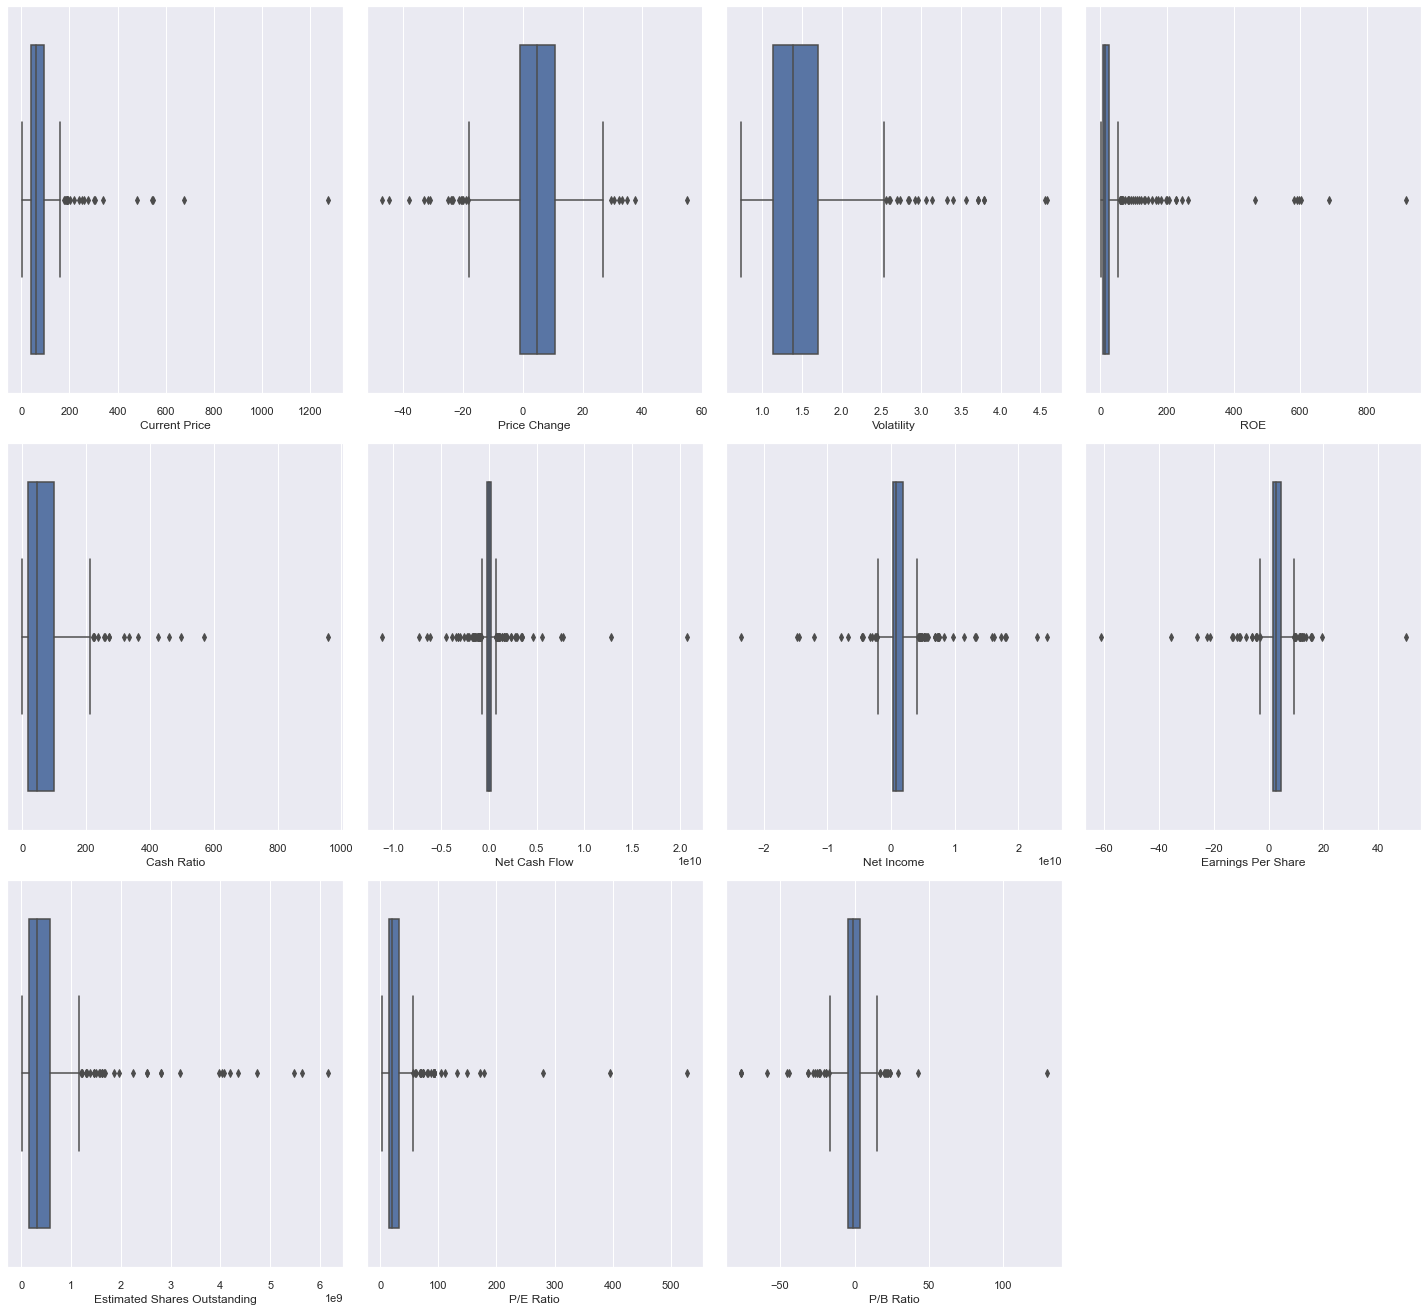

In [67]:
# let's plot the boxplots of all columns to check for outliers

# selecting numerical columns
num_col = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20, 30))
for i, variable in enumerate(num_col):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(data[variable], whis=1.5, orient="h")  # whisker 1.5 x iqr
    plt.tight_layout()

plt.show()

- Due to the numerous outliers for each variable, the outliers will be treated which ultimately may affect the clustering.

In [68]:
def treat_outliers(data, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    data: dataframe
    col: name of the column
    """
    Q1 = data[col].quantile(0.25)  # 25th quantile
    Q3 = data[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker)

    return data


def treat_outliers_all(data, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    data: data frame
    """
    for c in col_list:
        data = treat_outliers(data, c)

    return data

In [69]:
# treat the outliers
data = treat_outliers_all(data, num_col)  

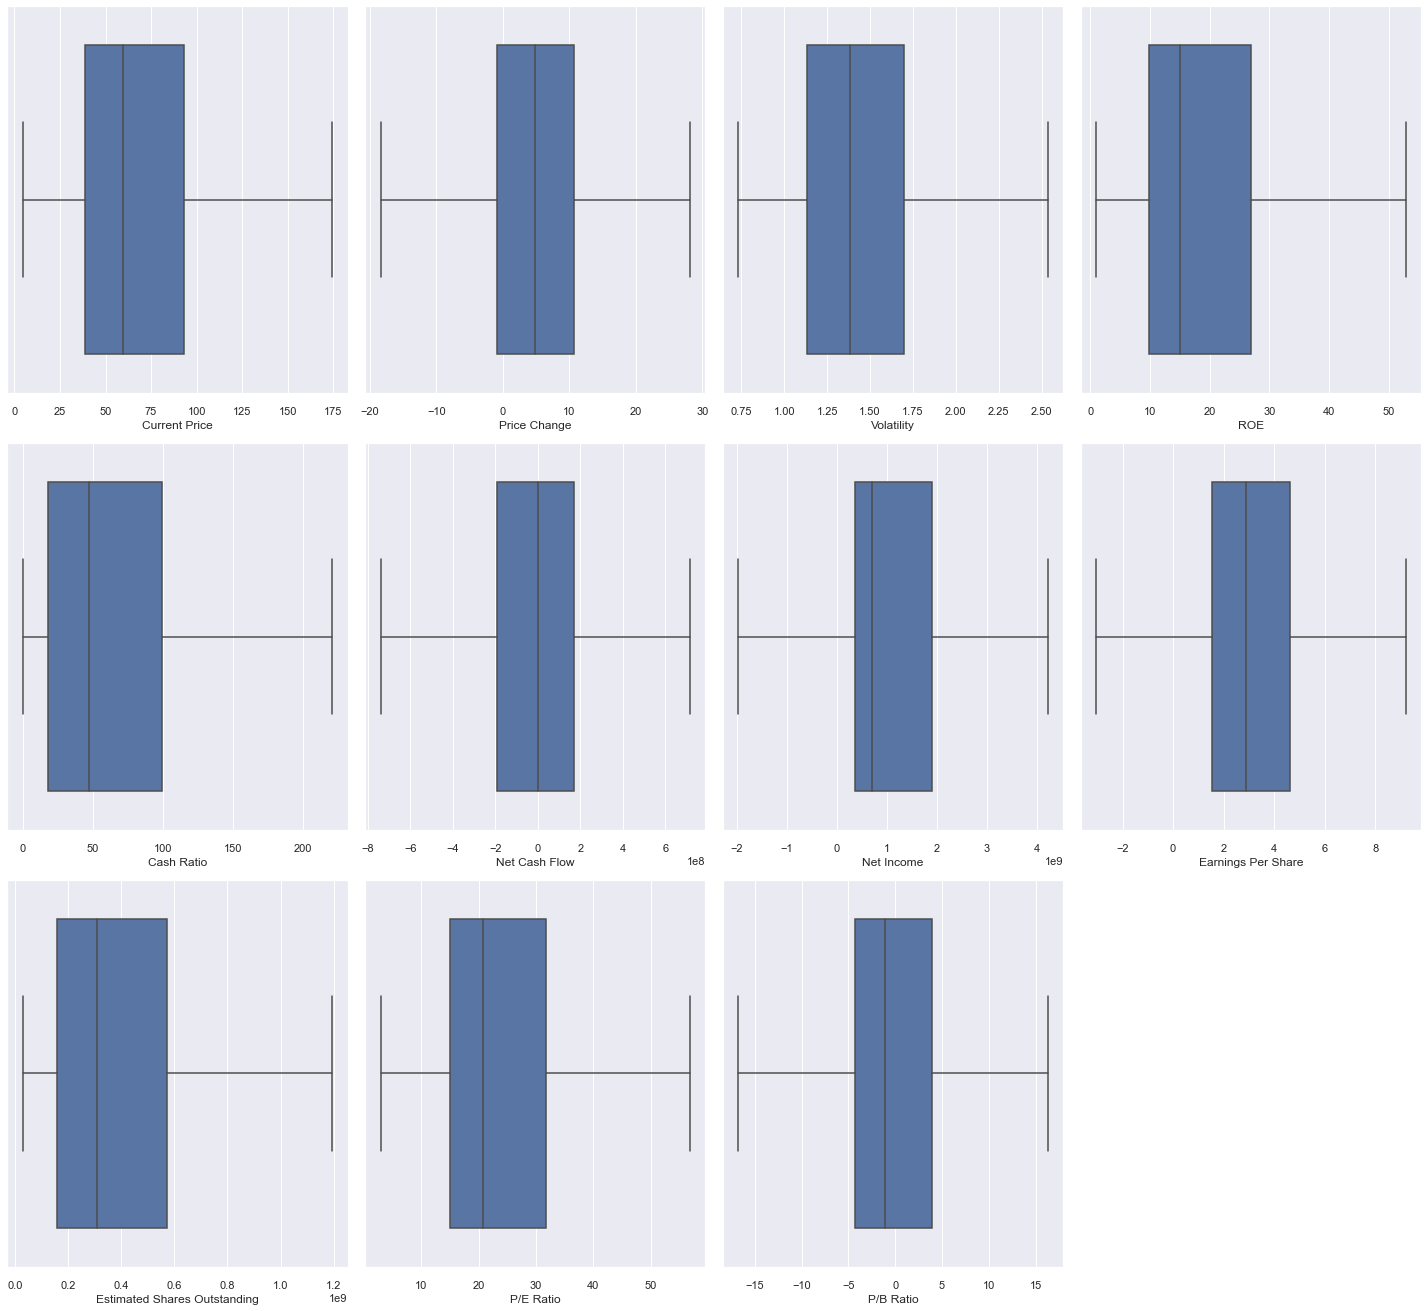

In [70]:
# treated boxplots from outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(num_col):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(data[variable], whis=1.5)
    plt.tight_layout()

plt.show()

- As a result of treatment, the outliers for each numerical variable have been treated.

### Scaling Data

In [71]:
#statistical summary of numerical data before scaling
data.describe()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
count,340.000000,340.000000,340.000000,340.000000,340.000000,3.400000e+02,3.400000e+02,340.000000,3.400000e+02,340.000000,340.000000
mean,70.333507,4.347886,1.482875,20.518015,63.088235,-4.604551e+06,1.197628e+09,3.098004,4.386644e+08,25.565404,-1.220577
std,43.067827,10.305069,0.456429,15.308106,58.395593,4.186738e+08,1.530431e+09,2.896002,3.562553e+08,14.647141,7.594997
min,4.500000,-18.391948,0.733163,1.000000,0.000000,-7.394824e+08,-1.967747e+09,-3.036250,2.767216e+07,2.935451,-16.755740
25%,38.555000,-0.939484,1.134878,9.750000,18.000000,-1.939065e+08,3.523012e+08,1.557500,1.588482e+08,15.044653,-4.352056
50%,59.705000,4.819505,1.385593,15.000000,47.000000,2.098000e+06,7.073360e+08,2.895000,3.096751e+08,20.819876,-1.067170
75%,92.880001,10.695493,1.695549,27.000000,99.000000,1.698108e+08,1.899000e+09,4.620000,5.731175e+08,31.764755,3.917066
max,174.367503,28.147957,2.536555,52.875000,220.500000,7.153866e+08,4.219048e+09,9.213750,1.194521e+09,56.844909,16.320749


In [72]:
# variables used for clustering
num_col

['Current Price',
 'Price Change',
 'Volatility',
 'ROE',
 'Cash Ratio',
 'Net Cash Flow',
 'Net Income',
 'Earnings Per Share',
 'Estimated Shares Outstanding',
 'P/E Ratio',
 'P/B Ratio']

In [73]:
# scales subset in preparation for clustering
scaler = StandardScaler()  # sets scaling used as StandardScaler
subset = data[num_col]  # creates subset of data for only numeric values
subset_scaled = scaler.fit_transform(
    subset
)  

In [74]:
# creates DataFrame of scaled subset
subset_scaled_data = pd.DataFrame(
    subset_scaled, columns=subset.columns
)  
subset_scaled_data.sample(5)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
296,-0.395389,1.836896,0.227850,-0.491837,-0.756105,0.609018,0.014639,0.062937,-0.673055,-0.102237,-0.100201
187,1.143521,0.990401,0.067051,-0.949785,-0.961903,-0.551109,-0.940746,-2.098392,-1.005975,-0.562760,2.044000
0,-0.650712,0.549287,0.448212,2.116831,-0.207311,-1.433763,1.977138,2.114902,0.645054,-1.493768,-0.997339
297,0.814718,0.411686,0.814593,0.620322,-0.447409,-0.127723,0.224039,2.114902,-0.886806,-1.171632,0.766729
139,-1.002769,-0.013115,-0.203032,-0.230153,-0.275910,-0.026244,0.115780,-0.020058,-0.788138,1.490646,-0.362986


### EDA

- It is a good idea to explore the data once again after preprocessing.

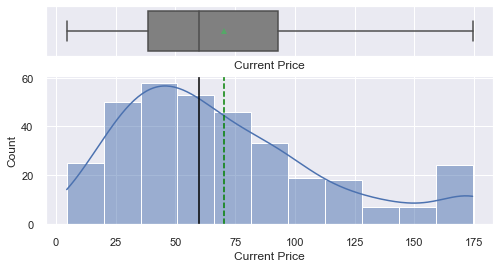

In [75]:
histogram_boxplot(data, "Current Price", kde=True, figsize=(8, 4))

- Current Price is now slightly right skewed.

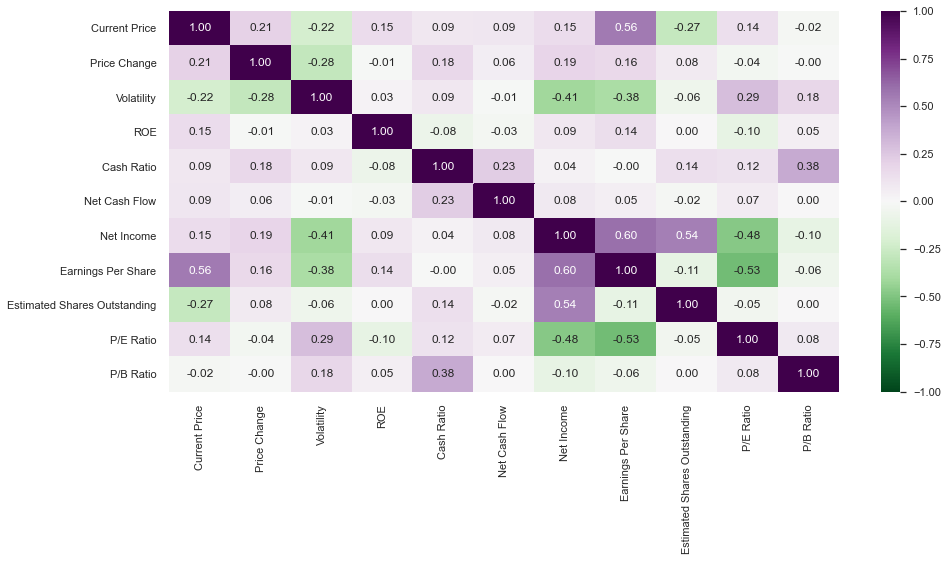

In [76]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    data[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="PRGn_r"
)
plt.show()

- The correlation between the variables has not changed much.  Positive and negative correlation still exist.

### K-means Clustering

Number of Clusters: 1 	Average Distortion: 3.1482665386211908
Number of Clusters: 2 	Average Distortion: 2.9507542400143842
Number of Clusters: 3 	Average Distortion: 2.7586235347054844
Number of Clusters: 4 	Average Distortion: 2.640116639443573
Number of Clusters: 5 	Average Distortion: 2.533537924306939
Number of Clusters: 6 	Average Distortion: 2.461926195024149
Number of Clusters: 7 	Average Distortion: 2.3937317952548502
Number of Clusters: 8 	Average Distortion: 2.3328163373522646
Number of Clusters: 9 	Average Distortion: 2.2764124738565856


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

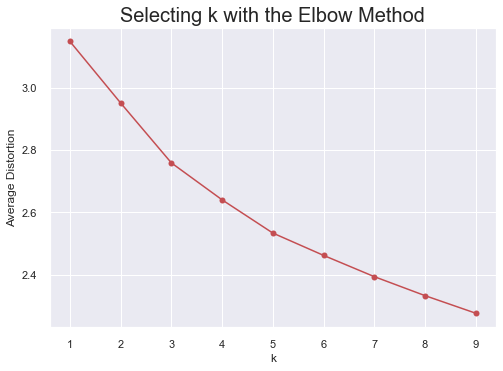

In [77]:
# Calculating Average Distortion for different number of clusters
clusters = range(1, 10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_data)
    prediction = model.predict(subset_scaled_data)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_data, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_data.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "ro-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

- For the k value, 4 or 5 appears to be optimal.

### Silhouette Score

For n_clusters = 2, silhouette score is 0.15544577379948135
For n_clusters = 3, silhouette score is 0.17474065182047419
For n_clusters = 4, silhouette score is 0.17402723439323203
For n_clusters = 5, silhouette score is 0.14626879664082354
For n_clusters = 6, silhouette score is 0.1302937667269699
For n_clusters = 7, silhouette score is 0.15019541105240866
For n_clusters = 8, silhouette score is 0.12946915956823118
For n_clusters = 9, silhouette score is 0.11206675078366317


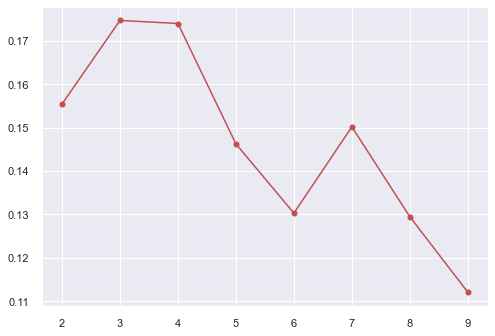

In [78]:
sil_score = []
cluster_list = list(range(2, 10))  # Sil_score can't be calculated for 1 cluster
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_data))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_data, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score, "ro-")

 - The Silhouette Score for 3 is the highest, as reflected by the graph.

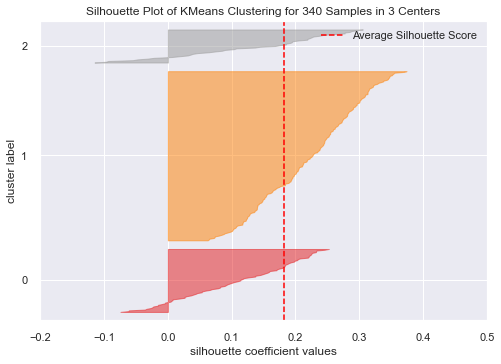

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [79]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_data)
visualizer.show()

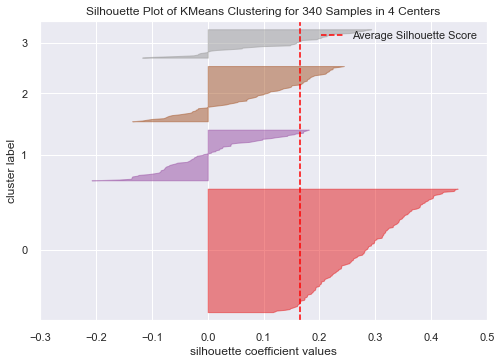

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [80]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_data)
visualizer.show()

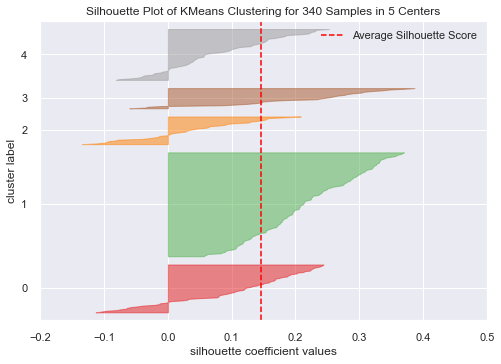

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [81]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_data)
visualizer.show()

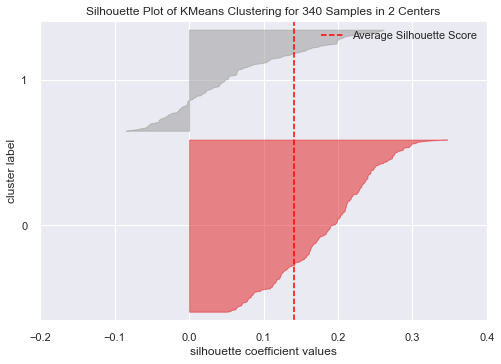

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [82]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(subset_scaled_data)
visualizer.show()

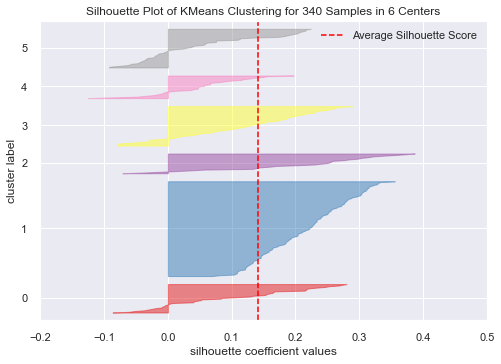

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [83]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_data)
visualizer.show()

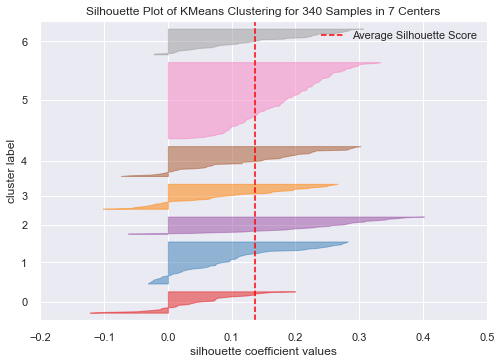

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [84]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(subset_scaled_data)
visualizer.show()

#### Observations

- For 3 clusters, there is a small bend in the elbow plot and the silhouette score is the highest for 3 as well.
- Our analysis will be based upon 3 clusters.

### Cluster Prediction

In [85]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_scaled_data)

# adding kmeans cluster labels to the original dataframe
data["K_means_segments"] = kmeans.labels_

# adding kmeans cluster labels to the scaled dataframe
subset_scaled_data["K_means_segments"] = kmeans.labels_

cluster_profile = data.groupby("K_means_segments").mean()

cluster_profile["count_in_each_segment"] = (
    data.groupby("K_means_segments")["Security"].count().values
)

In [86]:
# cluster profiles displayed in light green for the maximum values
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,72.379211,7.674176,1.314223,24.381098,75.542683,25647318.597561,3361960417.682927,4.690381,886688946.727286,18.437960,-1.134118,82
1,74.856143,5.345196,1.384541,18.493605,52.662791,-12051944.767442,731407069.767442,3.249221,258086441.274198,24.652704,-2.141450,215
2,43.819217,-6.981825,2.296159,23.273256,91.465116,-25057197.674419,-598595654.069767,-0.694709,487181986.406221,43.720776,3.218910,43


- Cluster 0 has the maximum values for 6 of the variables: Price Change, ROE, Net Cash Flow, Net Income, Earnings Per Share, and Estimated Shares Outstanding.
- Cluster 1 had the maximum number of Securities at 215, followed by Cluster 0 at 82.   

In [87]:
# cluster profiles displayed in light green for the maximum values
cluster_profile.style.highlight_min(color="lightblue", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,72.379211,7.674176,1.314223,24.381098,75.542683,25647318.597561,3361960417.682927,4.690381,886688946.727286,18.437960,-1.134118,82
1,74.856143,5.345196,1.384541,18.493605,52.662791,-12051944.767442,731407069.767442,3.249221,258086441.274198,24.652704,-2.141450,215
2,43.819217,-6.981825,2.296159,23.273256,91.465116,-25057197.674419,-598595654.069767,-0.694709,487181986.406221,43.720776,3.218910,43


- Cluster 2 has the minimum values for 5 of the variables: Current Price, Price Change, Net Cash Flow, Net Income, and Earnings Per Share.
- Cluster 2 had the minimum number of Securities at 43.    

In [88]:
# count of Securities in each cluster
cluster_profile["count_in_each_segment"]

K_means_segments
0     82
1    215
2     43
Name: count_in_each_segment, dtype: int64

In [89]:
# the names of the companies in each cluster
for cl in data["K_means_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(data[data["K_means_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories' 'AFLAC Inc'
 'American International Group, Inc.' 'Applied Materials Inc' 'Amgen Inc'
 'Broadcom' 'American Express Co' 'Boeing Company' 'Bank of America Corp'
 'BB&T Corporation' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Bristol-Myers Squibb' 'Citigroup Inc.' 'Caterpillar Inc.'
 'Chubb Limited' 'Colgate-Palmolive' 'Capital One Financial' 'CSX Corp.'
 'Cognizant Technology Solutions' 'CVS Health' 'Chevron Corp.'
 'Delta Air Lines' 'Du Pont (E.I.)' 'Discover Financial Services'
 'Danaher Corp.' 'The Walt Disney Company' 'Duke Energy' 'eBay Inc.'
 'Ford Motor' 'Facebook' 'General Dynamics' 'Gilead Sciences'
 'Corning Inc.' 'General Motors' "Honeywell Int'l Inc." 'HP Inc.'
 'International Business Machines' 'Intel Corp.' 'Illinois Tool Works'
 'JPMorgan Chase & Co.' 'Coca Cola Company' 'Lilly (Eli) & Co.'
 'Lockheed Martin Corp.' 'Southwest Airlines' 'Level 3 Communi

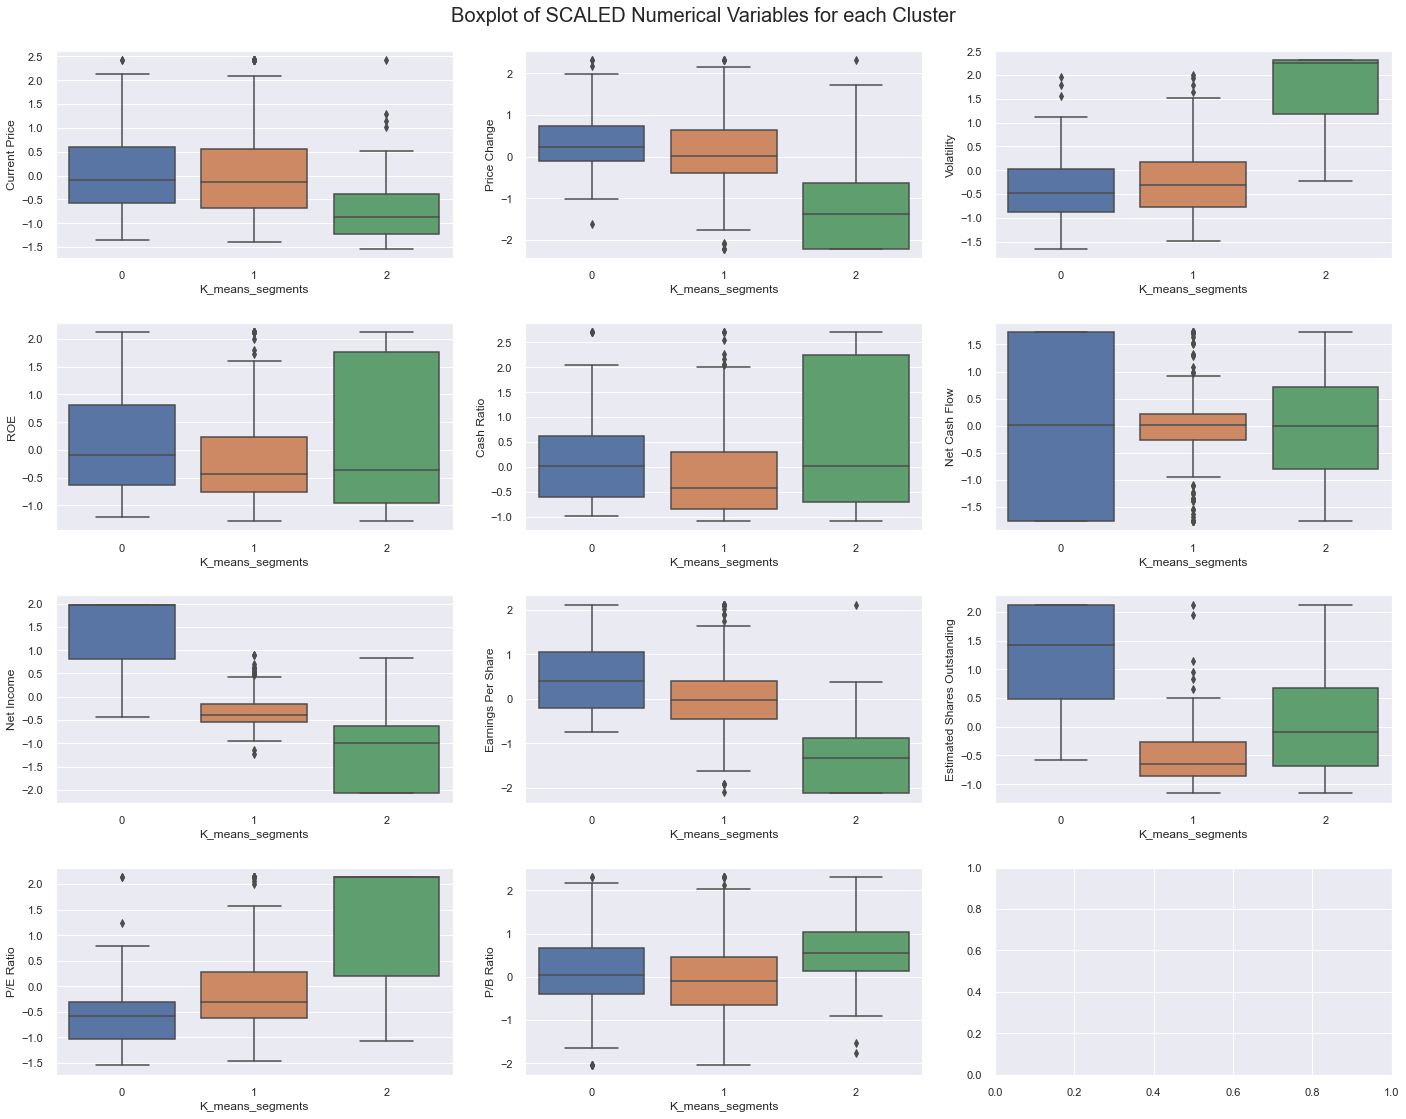

In [90]:
fig, axes = plt.subplots(4, 3, figsize=(20, 16))
fig.suptitle("Boxplot of SCALED Numerical Variables for each Cluster", fontsize=20)
counter = 0
for ii in range(4):
    sns.boxplot(
        ax=axes[ii][0],
        y=subset_scaled_data[num_col[counter]],
        x=subset_scaled_data["K_means_segments"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][1],
        y=subset_scaled_data[num_col[counter]],
        x=subset_scaled_data["K_means_segments"],
    )
    counter = counter + 1
    if counter < 11:
        sns.boxplot(
            ax=axes[ii][2],
            y=subset_scaled_data[num_col[counter]],
            x=subset_scaled_data["K_means_segments"],
        )
    counter = counter + 1


fig.tight_layout(pad=2.0)

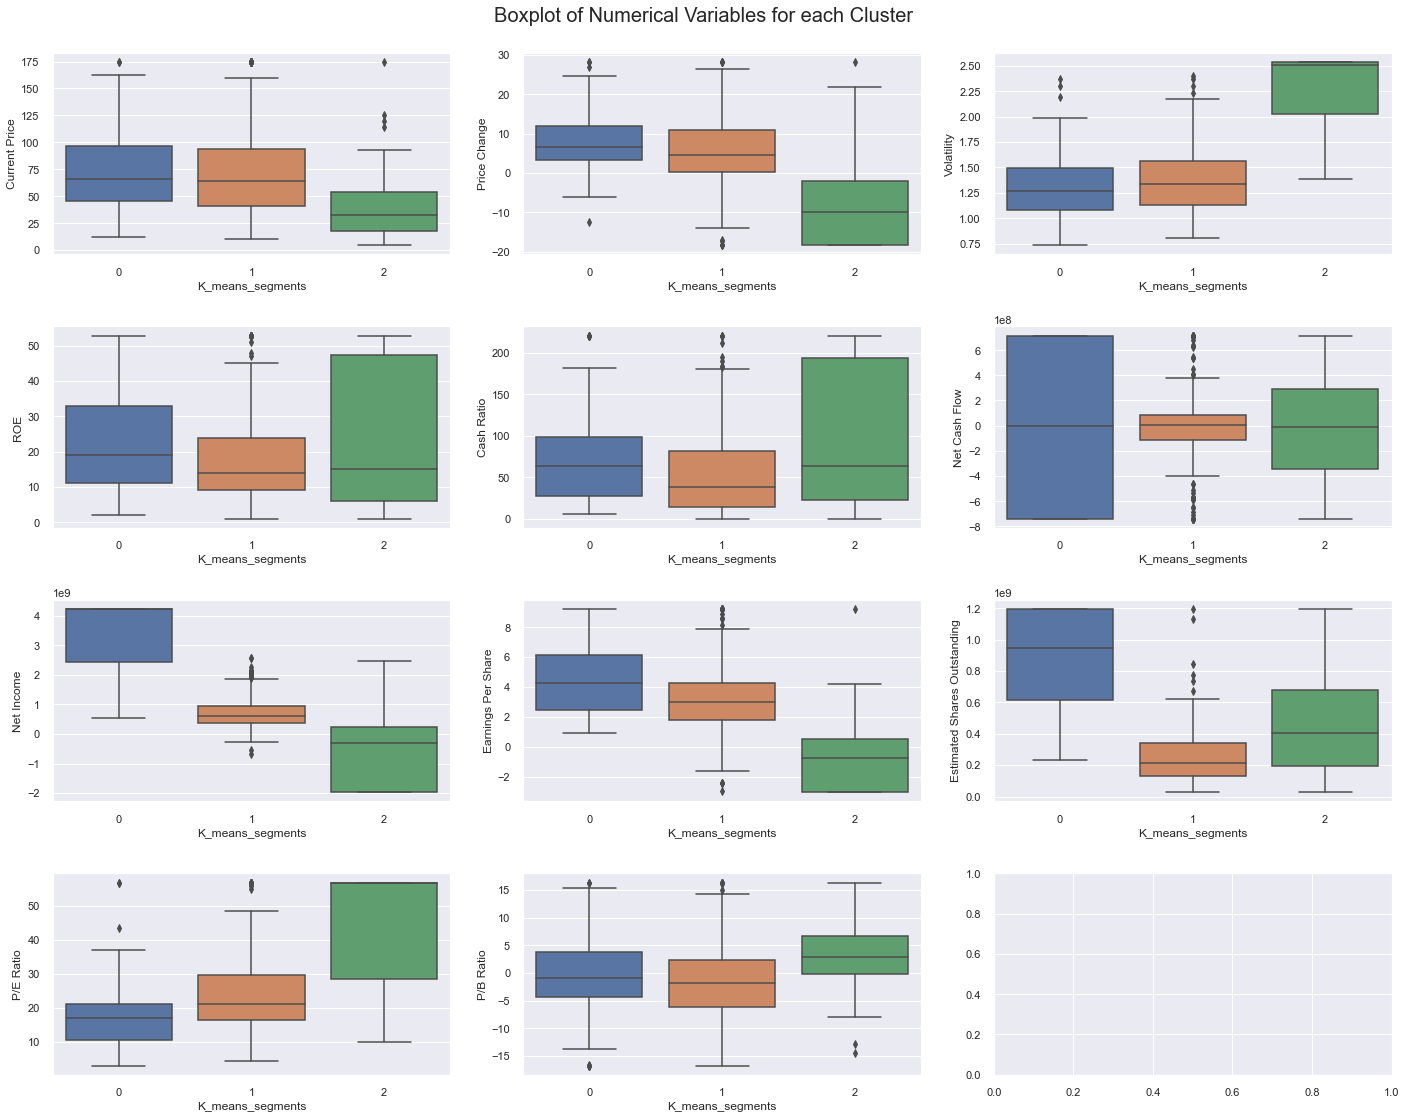

In [91]:
fig, axes = plt.subplots(4, 3, figsize=(20, 16))
fig.suptitle("Boxplot of Numerical Variables for each Cluster", fontsize=20)
counter = 0
for ii in range(4):
    sns.boxplot(
        ax=axes[ii][0],
        y=data[num_col[counter]],
        x=data["K_means_segments"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][1],
        y=data[num_col[counter]],
        x=data["K_means_segments"],
    )
    counter = counter + 1
    if counter < 11:
        sns.boxplot(
            ax=axes[ii][2],
            y=data[num_col[counter]],
            x=data["K_means_segments"],
        )
    counter = counter + 1


fig.tight_layout(pad=2.0)

#### Scaled Values in each Cluster

<AxesSubplot:xlabel='K_means_segments'>

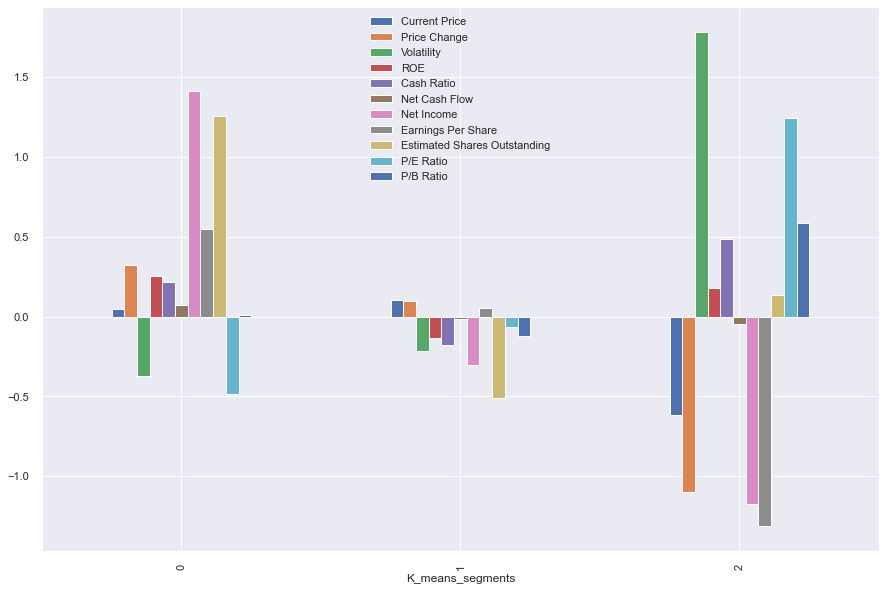

In [92]:
subset_scaled_data.groupby("K_means_segments").mean().plot.bar(figsize=(15, 10))

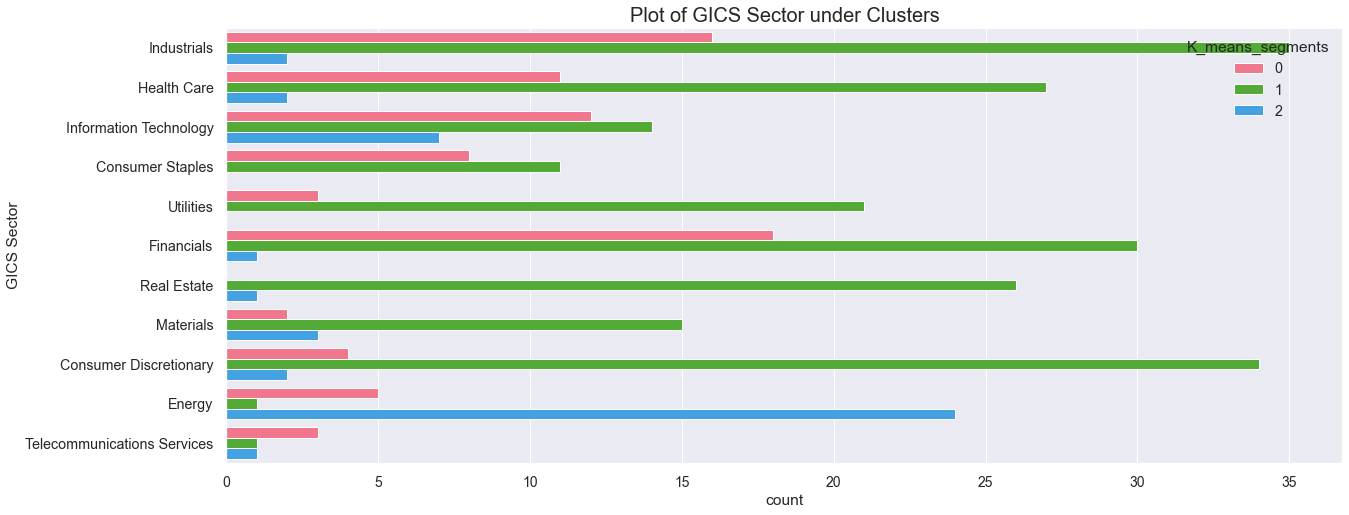

In [93]:
fig = plt.figure(figsize=(20, 8));
sns.set(font_scale = 1.3)
sns.countplot(data=data, y="GICS Sector", hue="K_means_segments", saturation=0.9, palette="husl");
plt.xticks(rotation=0, fontsize=14);
plt.title("Plot of GICS Sector under Clusters", fontsize=20);

### Insights

#### Cluster 0
- There are 82 Companies.
- Price Change, ROE, Net Cash Flow, Net Income, Earnings Per Share, & Estimated Shares Outstanding have the highest values in this cluster. 
- Volatility and P/E Ratio have the lowest values in this cluster.
- Most of the Companies in the Telecommunications Services Sector belong in this cluster.


#### Cluster 1
- There are 215 Companies.
- Current Price has the highest value in this cluster.
- ROE, Cash Ratio, Estimated Shares Outstanding and P/B Ratio have the lowest values in this cluster.
- Most of the Companies in the Industrials, Health Care, Information Technology, Utilities, Financials, Real Estate, Materials, and Consumer Discretionary belong in this cluster.

#### Cluster 2
- There are 43 Companies.
- Volatility, Cash Ratio, P/E Ratio and P/B Ratio have the highest values in this cluster.
- Current Price, Price Change, Net Cash Flow, Net Income and Earnings per Share have the lowest values in this cluster.
- Most of the Companies in the Energy Sector belong in this cluster.


- Removing the K_means_segments column from Original and Scaled data to perform Hierarchical Clustering for further analysis.

In [94]:
subset_scaled_data.drop(columns=["K_means_segments"], axis=1, inplace=True)

In [95]:
data.drop(columns=["K_means_segments"], axis=1, inplace=True)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 340 entries, Industrials to Health Care
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    float64
 8   Cash Ratio                    340 non-null    float64
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float

### Hierarchical Clustering

#### Computing Cophenetic Correlation

In [103]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

# creating empty data frame With NaN values
df_metrics = pd.DataFrame(columns = ['Distance Metrics', 'Linkage Methods', 'Cophenetic Correlation'])

count=0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_data, metric=dm, method=lm) # creating hierarchical clusters
        c, coph_dists = cophenet(Z, pdist(subset_scaled_data)) # computing cophenetic correlation
        df_metrics.loc[count] =[dm.capitalize(), lm.capitalize(), c] # adding values to the dataframe
        count=count+1
        
      
df_metrics

,Distance Metrics,Linkage Methods,Cophenetic Correlation
0,Euclidean,Single,0.693211
1,Euclidean,Complete,0.614780
2,Euclidean,Average,0.732561
3,Euclidean,Weighted,0.649644
4,Chebyshev,Single,0.721402
5,Chebyshev,Complete,0.368059
6,Chebyshev,Average,0.701139
7,Chebyshev,Weighted,0.503247
8,Mahalanobis,Single,0.617606
9,Mahalanobis,Complete,0.385430


In [98]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
max_index= df_metrics['Cophenetic Correlation'].idxmax() 

print(
    "Highest cophenetic correlation is {}, which is obtained with **{}** distance and **{}** linkage.".format(
        round(df_metrics['Cophenetic Correlation'].max(), 2) , df_metrics.loc[max_index][0], df_metrics.loc[max_index][1]
    )
)

Highest cophenetic correlation is 0.73, which is obtained with **Euclidean** distance and **Average** linkage.


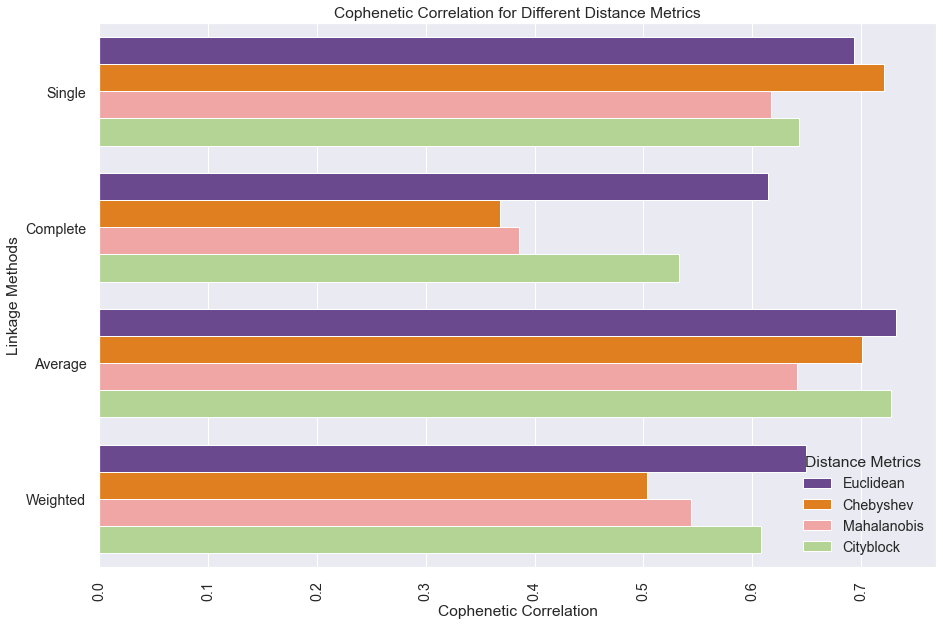

In [99]:
# plot of data visualization for cophenetic correlation 
plt.figure(figsize=(15,10))
sns.barplot(data=df_metrics, x='Cophenetic Correlation', y='Linkage Methods', hue = 'Distance Metrics', ci=None, estimator=sum, palette="Paired_r")
plt.xticks(rotation=90)
plt.title ('Cophenetic Correlation for Different Distance Metrics')
plt.show()

- As reflected in the graph, the highest cophenetic correlation is 0.732, obtained with Euclidean distance and Average linkage.

#### Different Linkage Methods using Euclidean Distance Only

In [100]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# creating empty data frame With NaN values
data_euclidean = pd.DataFrame(columns = ['Distance Metrics', 'Linkage Methods', 'Cophenetic Correlation'])

count=0
for lm in linkage_methods:
    Z = linkage(subset_scaled_data, metric="euclidean", method=lm) # creating hierarchical clusters
    c, coph_dists = cophenet(Z, pdist(subset_scaled_data)) # computing cophenetic correlation
    data_euclidean.loc[count] =["euclidean".capitalize(), lm.capitalize(), c] # adding values to the dataframe
    count=count+1
        
data_euclidean

,Distance Metrics,Linkage Methods,Cophenetic Correlation
0,Euclidean,Single,0.693211
1,Euclidean,Complete,0.614780
2,Euclidean,Average,0.732561
3,Euclidean,Centroid,0.729433
4,Euclidean,Ward,0.575331
5,Euclidean,Weighted,0.649644


In [105]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
max_index= data_euclidean['Cophenetic Correlation'].idxmax() 

print(
    "Highest cophenetic correlation is {}, which is obtained with **{}** distance and **{}** linkage.".format(
        round(data_euclidean['Cophenetic Correlation'].max(), 2) , data_euclidean.loc[max_index][0], data_euclidean.loc[max_index][1]
    )
)

Highest cophenetic correlation is 0.73, which is obtained with **Euclidean** distance and **Average** linkage.


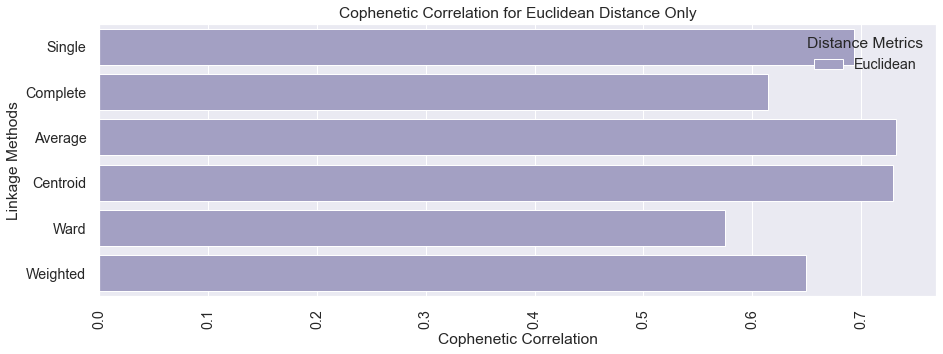

In [106]:
# plot of data visualization for cophenetic correlation 
plt.figure(figsize=(15,5))
sns.barplot(data=data_euclidean, x='Cophenetic Correlation', y='Linkage Methods', hue = 'Distance Metrics', ci=None, estimator=sum, palette="Purples_r")
plt.xticks(rotation=90)
plt.title ('Cophenetic Correlation for Euclidean Distance Only')
plt.show()

- As reflected in the graph, the highest cophenetic correlation is 0.732, obtained with Euclidean distance and Average linkage.

#### Dendrograms

- The optimal number of clusters from a dendrogram can be obtained by deciding where to cut the cluster tree. Generally, the cluster tree is cut where dendrogram height is maximum as it corresponds to distinct and homogeneous clusters. Let us see the dendrograms for the different linkage methods when the measure of distance is euclidean.

In [107]:
hc_data = subset_scaled_data.copy()

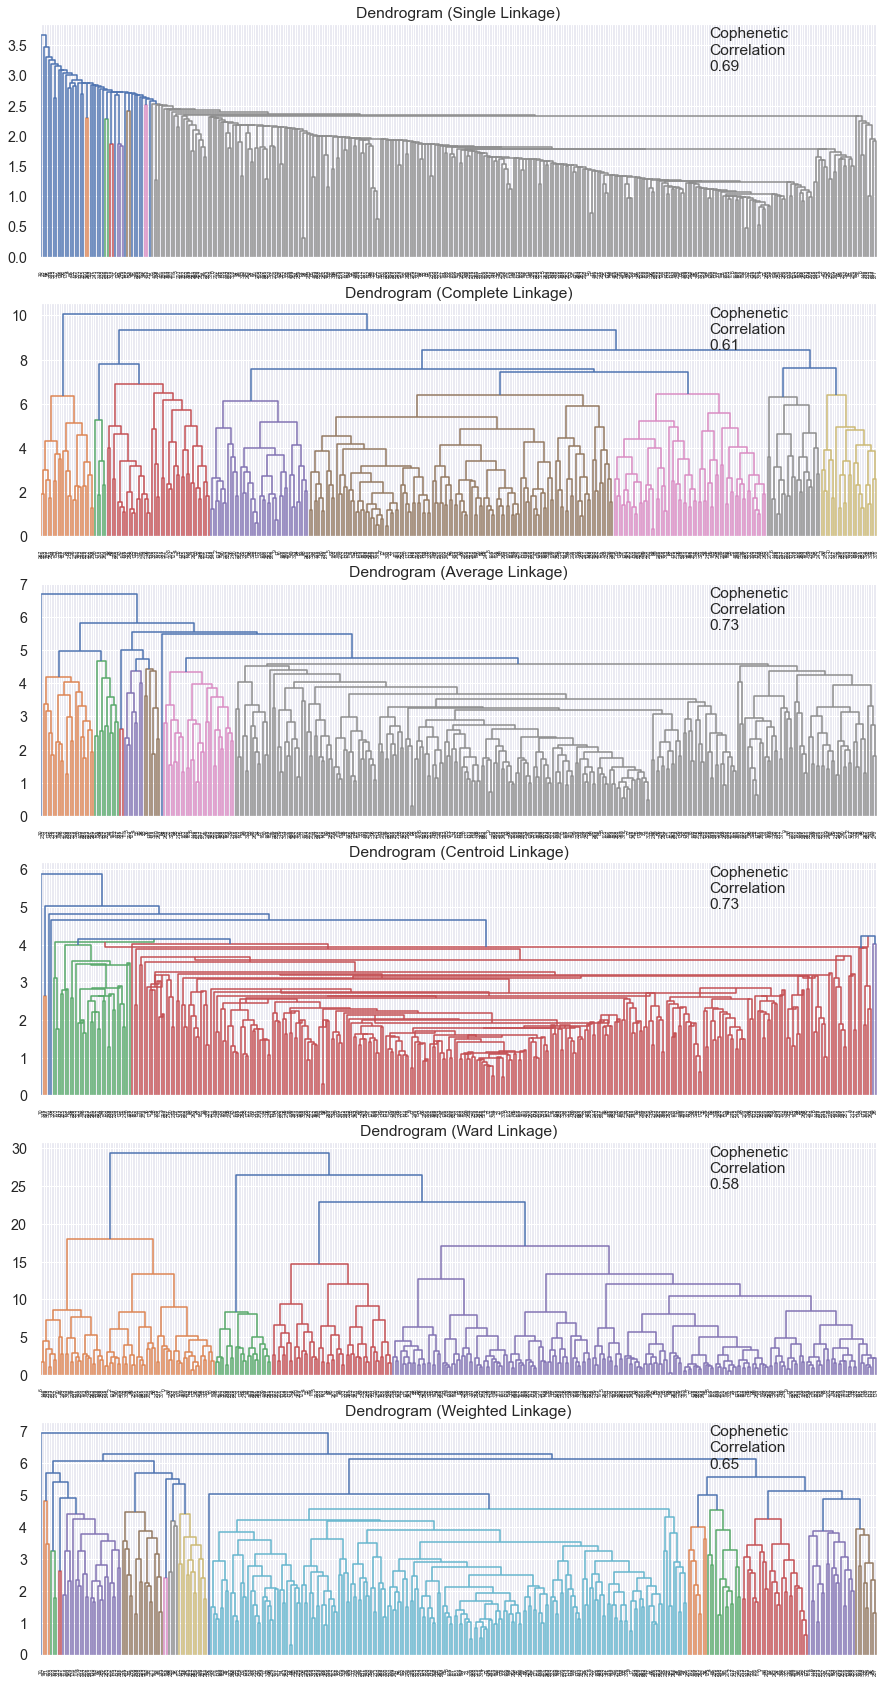

In [108]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_data, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_data))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [109]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
data_cc = pd.DataFrame(compare, columns=compare_cols)
data_cc = data_cc.sort_values(by="Cophenetic Coefficient")
data_cc

,Linkage,Cophenetic Coefficient
4,ward,0.575331
1,complete,0.614780
5,weighted,0.649644
0,single,0.693211
3,centroid,0.729433
2,average,0.732561


- 3 Clusters, Euclidean Distance and Average Linkage is currently chosen as the best model based on the Cophenetic Correlation.

In [110]:
Eucl_Avg_Model = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")
Eucl_Avg_Model.fit(hc_data)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [111]:
# creating a copy of the original data
data_2 = data.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_data["HC_segments"] = Eucl_Avg_Model.labels_  # hc_data is scaled data
data_2["HC_segments"] = Eucl_Avg_Model.labels_   # data_2 is Eucledian orignal data

#### Cluster Profiling (Euclidean Distance with Average Linkage)

In [112]:
# Creating cluster profile with mean of each variable in the clusters with original data
cluster_profile = data_2.groupby("HC_segments").mean()

In [113]:
cluster_profile["count_in_each_segment"] = (
    data_2.groupby("HC_segments")["Security"].count().values
)

In [114]:
# let's see the names of the companies in each cluster
for cl in data_2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(data_2[data_2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Alliance Data Systems' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Alexion Pharmaceuticals'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc' 'Amphenol Corp'
 'Arconic Inc' 'Activision Blizzard' 'AvalonBay Communities, Inc.'
 'Broadcom' 'American Water Works Company Inc' 'American Express Co'
 'Boeing Company' 'Bank of America Corp' 'Baxter International Inc.'
 'BB&T Corporation' 'Bard (C.R.) Inc.' 'BIOGEN IDEC Inc.'
 'The Bank of New York Mellon Corp.' 'Bal

In [115]:
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,73.500373,5.770431,1.388864,20.094562,62.525974,-8047879.058442,1401345306.006494,3.543336,436542968.197127,23.292853,-1.618265,308
1,174.367503,-18.391948,2.474002,22.000000,220.500000,-171460000.000000,475602000.000000,9.213750,31085098.040000,31.362745,16.320749,1
2,35.513226,-9.052249,2.384953,24.677419,63.596774,34989008.064516,-803106294.354839,-1.523871,472889826.396855,47.957287,2.164800,31


In [116]:
cluster_profile.style.highlight_min(color="lightblue", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,73.500373,5.770431,1.388864,20.094562,62.525974,-8047879.058442,1401345306.006494,3.543336,436542968.197127,23.292853,-1.618265,308
1,174.367503,-18.391948,2.474002,22.000000,220.500000,-171460000.000000,475602000.000000,9.213750,31085098.040000,31.362745,16.320749,1
2,35.513226,-9.052249,2.384953,24.677419,63.596774,34989008.064516,-803106294.354839,-1.523871,472889826.396855,47.957287,2.164800,31


- From the dataframe listed above, there is one single company cluster, one cluster of two companies, and all other 308 companies have been grouped into one cluster, the clustering does not look suitable because the clusters do not exhibit enough variability.
- Will re-evaluate with Ward Linkage as it has clear, well defined and more evenly spread out clusters compared to the others.  Four clusters appears to be a more suitable k value from the Dendrogram for Ward Linkage.

#### Cluster Profiling (re-evaluation) (Euclidean Distance with Ward Linkage)

In [117]:
# cluster profiling with Ward linkage
Eucl_Ward_Model = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
Eucl_Ward_Model.fit(hc_data)

AgglomerativeClustering(n_clusters=4)

In [118]:
# adding hierarchical cluster labels to the original and scaled dataframes
hc_data["HC_segments"] = Eucl_Ward_Model.labels_
data_2["HC_segments"] = Eucl_Ward_Model.labels_

In [119]:
hc_cluster_profile_ward = data_2.groupby("HC_segments").mean()

In [120]:
hc_cluster_profile_ward["count_in_each_segment"] = (
    data_2.groupby("HC_segments")["Security"].count().values
)

In [121]:
# highlight maximum values in dataframe
hc_cluster_profile_ward.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,117.143187,8.879694,1.474808,27.446078,117.901961,39513441.176471,1647049112.745098,5.585221,326338603.580686,27.337959,5.248438,51
1,68.441949,4.160906,1.372721,17.808108,42.459459,-63158243.918919,742378491.891892,3.003682,261213884.114270,23.823049,-3.084704,185
2,57.211221,7.346147,1.384595,20.779110,76.856164,96149080.479452,2886992198.630137,3.562106,952307972.041095,19.233719,-2.453494,73
3,35.513226,-9.052249,2.384953,24.677419,63.596774,34989008.064516,-803106294.354839,-1.523871,472889826.396855,47.957287,2.164800,31


- Cluster 0 has the maximum values for 4 of the variables: Current Price, Net Income, Earnings Per Share and Estimated Outstandings.
- Cluster 3 has the maximum values for 4 of the variables: Price Change, Cash Ratio, Net Cash Flow and P/B Ratio. 
- Cluster 1 has the maximum number of counts in each segment @ 197.   
    

In [122]:
# highlight minimum values in dataframe
hc_cluster_profile_ward.style.highlight_min(color="lightblue", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,117.143187,8.879694,1.474808,27.446078,117.901961,39513441.176471,1647049112.745098,5.585221,326338603.580686,27.337959,5.248438,51
1,68.441949,4.160906,1.372721,17.808108,42.459459,-63158243.918919,742378491.891892,3.003682,261213884.114270,23.823049,-3.084704,185
2,57.211221,7.346147,1.384595,20.779110,76.856164,96149080.479452,2886992198.630137,3.562106,952307972.041095,19.233719,-2.453494,73
3,35.513226,-9.052249,2.384953,24.677419,63.596774,34989008.064516,-803106294.354839,-1.523871,472889826.396855,47.957287,2.164800,31


- Cluster 2 has the minimum values for 6 of the variables: Current Price, Price Change, Cash Ratio, Net Cash Flow, Net income and Earning per Share.
- Cluster 2 has the minimum number of counts in each segment @ 23.   

In [123]:
hc_cluster_profile_ward = data_2.groupby("HC_segments").mean()

In [124]:
hc_cluster_profile_ward["count_in_each_segment"] = (
    data_2.groupby("HC_segments")["Security"].count().values
)

In [125]:
# Number of companies in each Cluster
hc_cluster_profile_ward["count_in_each_segment"]

HC_segments
0     51
1    185
2     73
3     31
Name: count_in_each_segment, dtype: int64

- Cluster 1 had the highest number of securities in each segment at 197, followed by Cluster 0 at 71, followed by Cluster 3 at 49 companies, and Cluster 2 had the least number of securities at 23.

In [126]:
# the names of the companies in each cluster
for cl in data_2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(data_2[data_2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 2, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'American International Group, Inc.' 'Applied Materials Inc' 'Amgen Inc'
 'Arconic Inc' 'Activision Blizzard' 'Broadcom' 'American Express Co'
 'Bank of America Corp' 'BB&T Corporation'
 'The Bank of New York Mellon Corp.' 'Bristol-Myers Squibb'
 'Boston Scientific' 'Citigroup Inc.' 'Carnival Corp.'
 'Capital One Financial' 'CSX Corp.' 'CVS Health' 'Chevron Corp.'
 'Delta Air Lines' 'Du Pont (E.I.)' 'Deere & Co.'
 'Discover Financial Services' 'Danaher Corp.' 'The Walt Disney Company'
 'Duke Energy' 'eBay Inc.' 'Eaton Corporation' 'Exelon Corp.' 'Ford Motor'
 'Gilead Sciences' 'Corning Inc.' 'General Motors' 'Host Hotels & Resorts'
 'Intel Corp.' 'JPMorgan Chase & Co.' 'Coca Cola Company'
 'Lilly (Eli) & Co.' 'Southwest Airlines' 'Mastercard Inc.'
 "McDonald's Corp." 'Mondelez International' 'MetLife Inc.'
 'Monster Beverage' 'Altria Group Inc' 'Merck & Co.' 'Mylan N.V.'
 'Navi

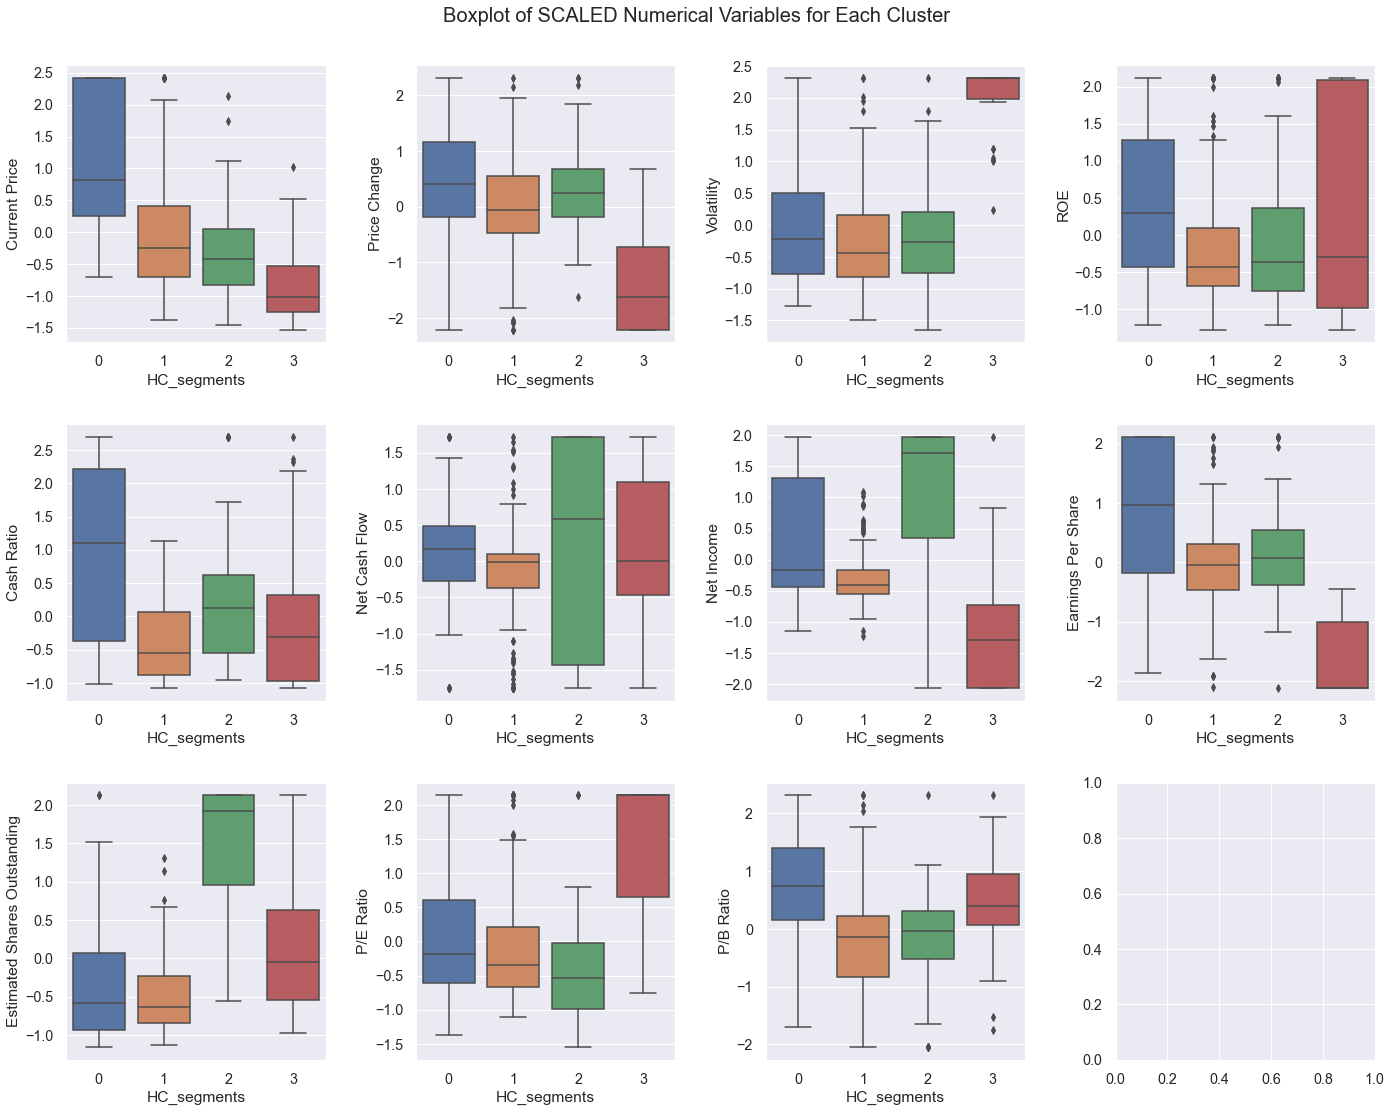

In [127]:
fig, axes = plt.subplots(3, 4,  figsize=(20, 16))
fig.suptitle('Boxplot of SCALED Numerical Variables for Each Cluster', fontsize=20)
counter = 0
for ii in range(3):
    for jj in range(4):
        if counter <11:
            sns.boxplot(ax=axes[ii, jj],y=hc_data[num_col[counter]],x=hc_data['HC_segments'])
        counter = counter+1

fig.tight_layout(pad=2.0)

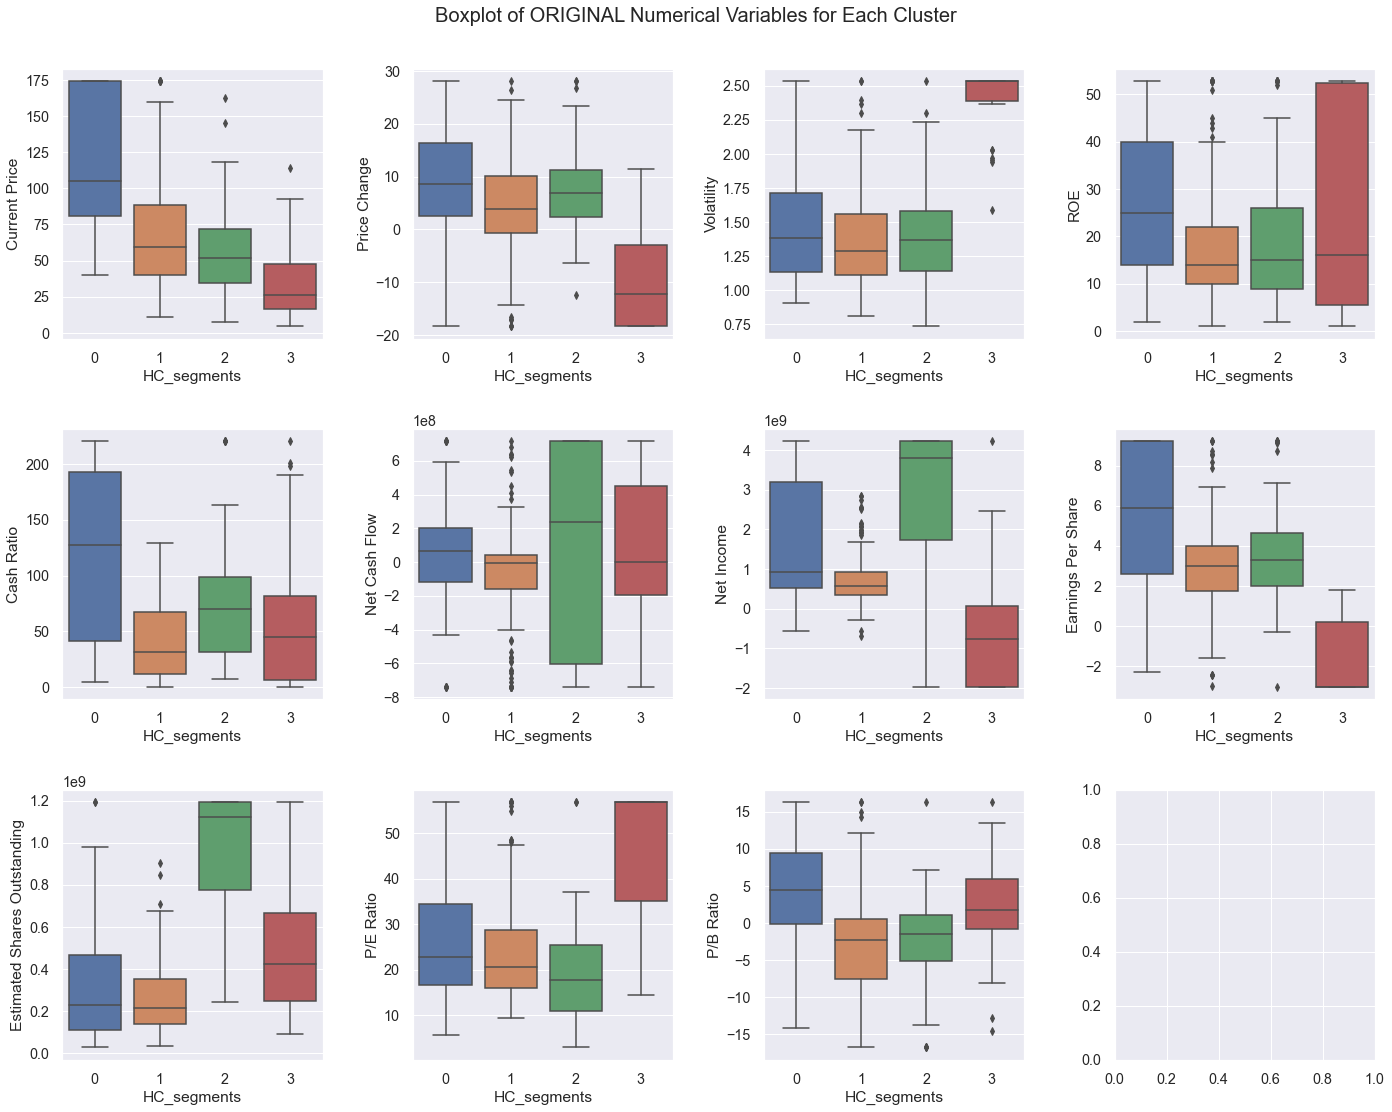

In [128]:
fig, axes = plt.subplots(3, 4,  figsize=(20, 16))
fig.suptitle('Boxplot of ORIGINAL Numerical Variables for Each Cluster', fontsize=20)
counter = 0
for ii in range(3):
    for jj in range(4):
        if counter <11:
            sns.boxplot(ax=axes[ii, jj],y=data_2[num_col[counter]],x=data_2['HC_segments'])
        counter = counter+1

fig.tight_layout(pad=2.0)

#### Original Values in each Cluster:

<AxesSubplot:xlabel='HC_segments'>

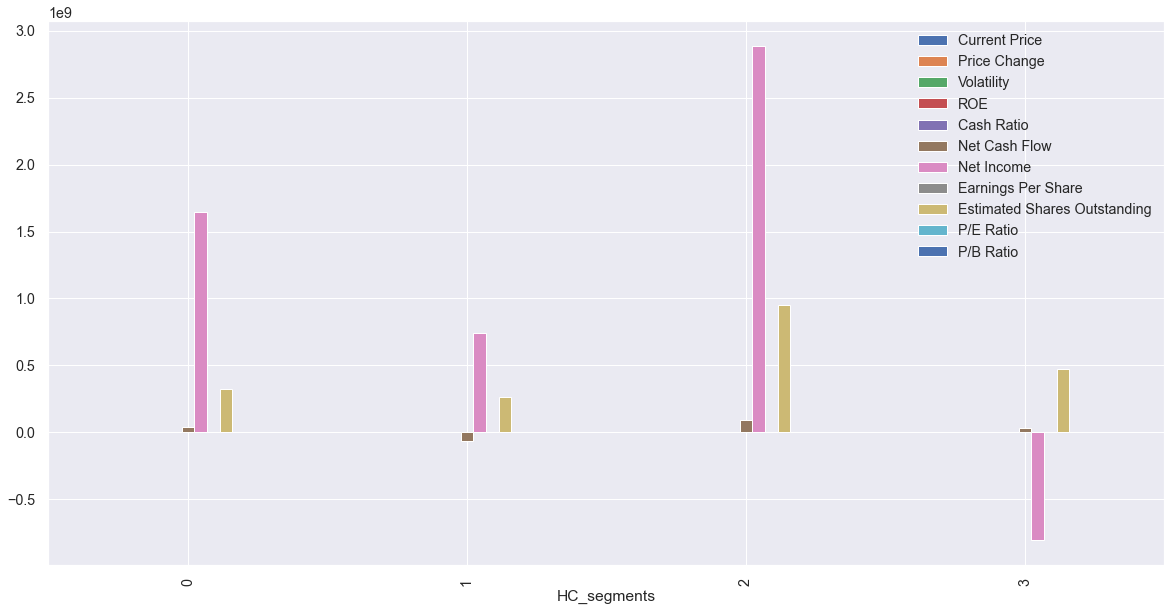

In [129]:
data_2.groupby("HC_segments").mean().plot.bar(figsize=(20, 10))

#### Scaled Values in each Cluster:

<AxesSubplot:xlabel='HC_segments'>

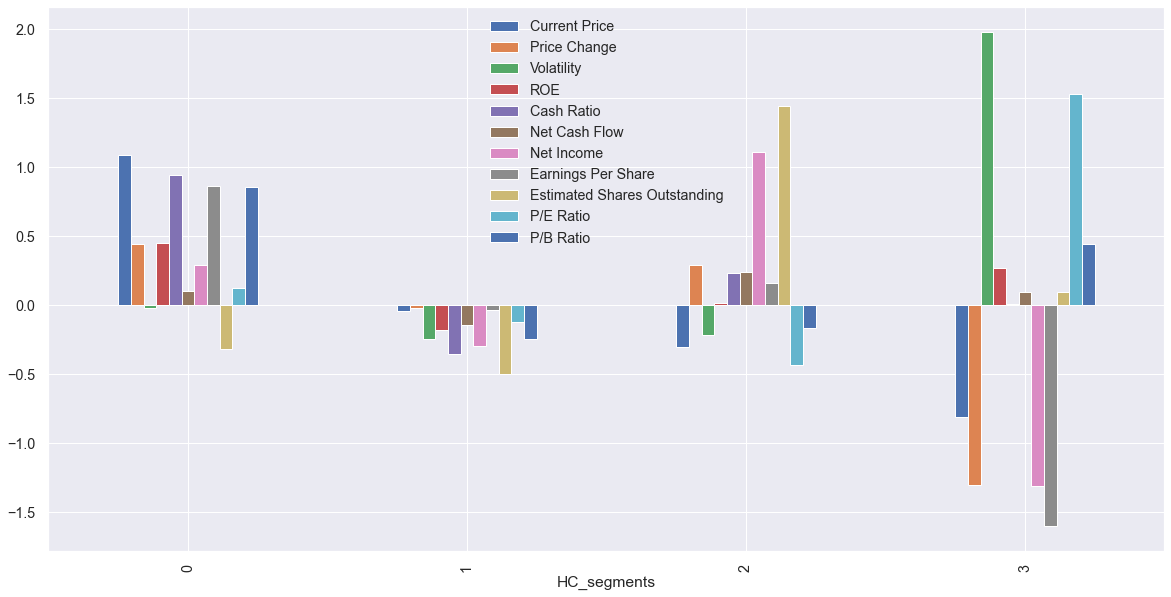

In [130]:
hc_data.groupby("HC_segments").mean().plot.bar(figsize=(20, 10))

### Insights on Model (Eucledian Distance w/ Ward Linkage)

#### Cluster 0
- There are 71 Securities.
- Net Income is the highest, followed by Earnings per share and Estimated Shares Outstanding have the highest values in this cluster.
- Volatility and P/E Ratio have the lowest values in this cluster, being negative.
- Current Price and ROE appear to be close to each other. 
- Securities present in this cluster appear to be from the Industrials, Health Care & Consumer Discretionary sectors.

#### Cluster 1
- There are 197 Securities.
- All of the variables are negative values and are small being less than -0.5.
- This cluster is the largest cluster and appears to cover all 11 GICS sectors. 

#### Cluster 2
- There are 23 Securities.
- Volatality, ROE and P/E Ratio have the highest values in this cluster.
- Earnings per share, Net income, Price change and Current price are the lowest and negative.
- Securities present in this cluster appear from the Financial, Health Care and Consumer Discretionary sectors.

#### Cluster 3
- There are 49 Securities.
- Cash Ratio and P/B Ratio are high.
- Price Change, Volatality, Estimated shares outstanding and P/E Ratio are moderate.
- Securities present in this cluster appear to be in the Energy Sector. 
- The Energy Sector comprises companies engaged in exploration & production, refining & marketing and storage & transportation of oil & gas and coal & consumable fuels.

### K-means vs Hierarchical Clustering

#### K-means Clustering

- 3 Clusters
- The elbow plot reflected a small bend at k=3.
- Silhouette Score is the highest for k=3.
- Less execution time.
- Maximum values in cluster 1.

#### Hierchical Clustering

- 4 Clusters
- Cluster 1 was almost 58% of the securities available in the dataset.
- Cluster 2 comprised less than 7% of the total securities available, but had the highest values in the dataset.
- Longer running time.
- The Hierchical Clustering method using Euclidean Distance with Ward Linkage provided the most distinct clusters, even though the cophenetic correlation was the lowest compared to the other correlations.

#### Observations

- Cluster 0: Net Income, Earnings Per Share, and Estimated Shares Outstanding had high values for both algorithms.
- Cluster 1: had the highest number of observations in both algorithms where both were at least 57% of the total number of observations.
- Cluster 2: shared the lowest number of observations and the minimum values in Current Price, Price Change, Net Cash Flow, Net Income and Earnings per Share for both algorithms.

### Actionable Insights and Recommendations

- <b>I would recommend to the Stakeholders Cluster 0. Although the Securities represented only account for ~21% of the total, Net Income is the highest followed by Earnings Per Share and Estimated Shares Outstanding.  These three have the highest values out of all the clusters.
- A high Net Income is favorable since Net Income is gross profit minus all other expenses and costs as well as any other income and revenue sources that are not included in gross income.
- Volatility and P/E Ratio are very low values.  
- Since volatility is the rate at which the price of a stock increases or decreases over a particular period, the stock prices for the Securities will be stable in this cluster.  
- A high P/E ratio suggests high expectations for future growth, perhaps because the company is small or is an a rapidly expanding market. However, in this case, a low P/E is preferred, since it suggests expectations are not too high and the company is more likely to outperform earnings forecasts.<b>    

- Although Cluster 1 had the largest number of observations, all of its values were negative and therefore, not a strong driving force in any aspect. Cluster 1 would be difficult to predict.
- Cluster 2 had strong negative values for Price Change, Net Income and Earnings Per Share while a dominant positive value for Volatility. Cluster 2 could make an investor worry alot.
- Cluster 3 had a strong Cash Ratio and Current Price with other positive values, but had a few negative values as well.